In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import itertools
import warnings
warnings.simplefilter("ignore")
import time

In [2]:
data_org=pd.read_csv("Part- 1,2&3 - Signal.csv")

In [3]:
data_org.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [4]:
data_org.describe().T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

In [5]:
data_org.shape

(1599, 12)

In [6]:
data=data_org

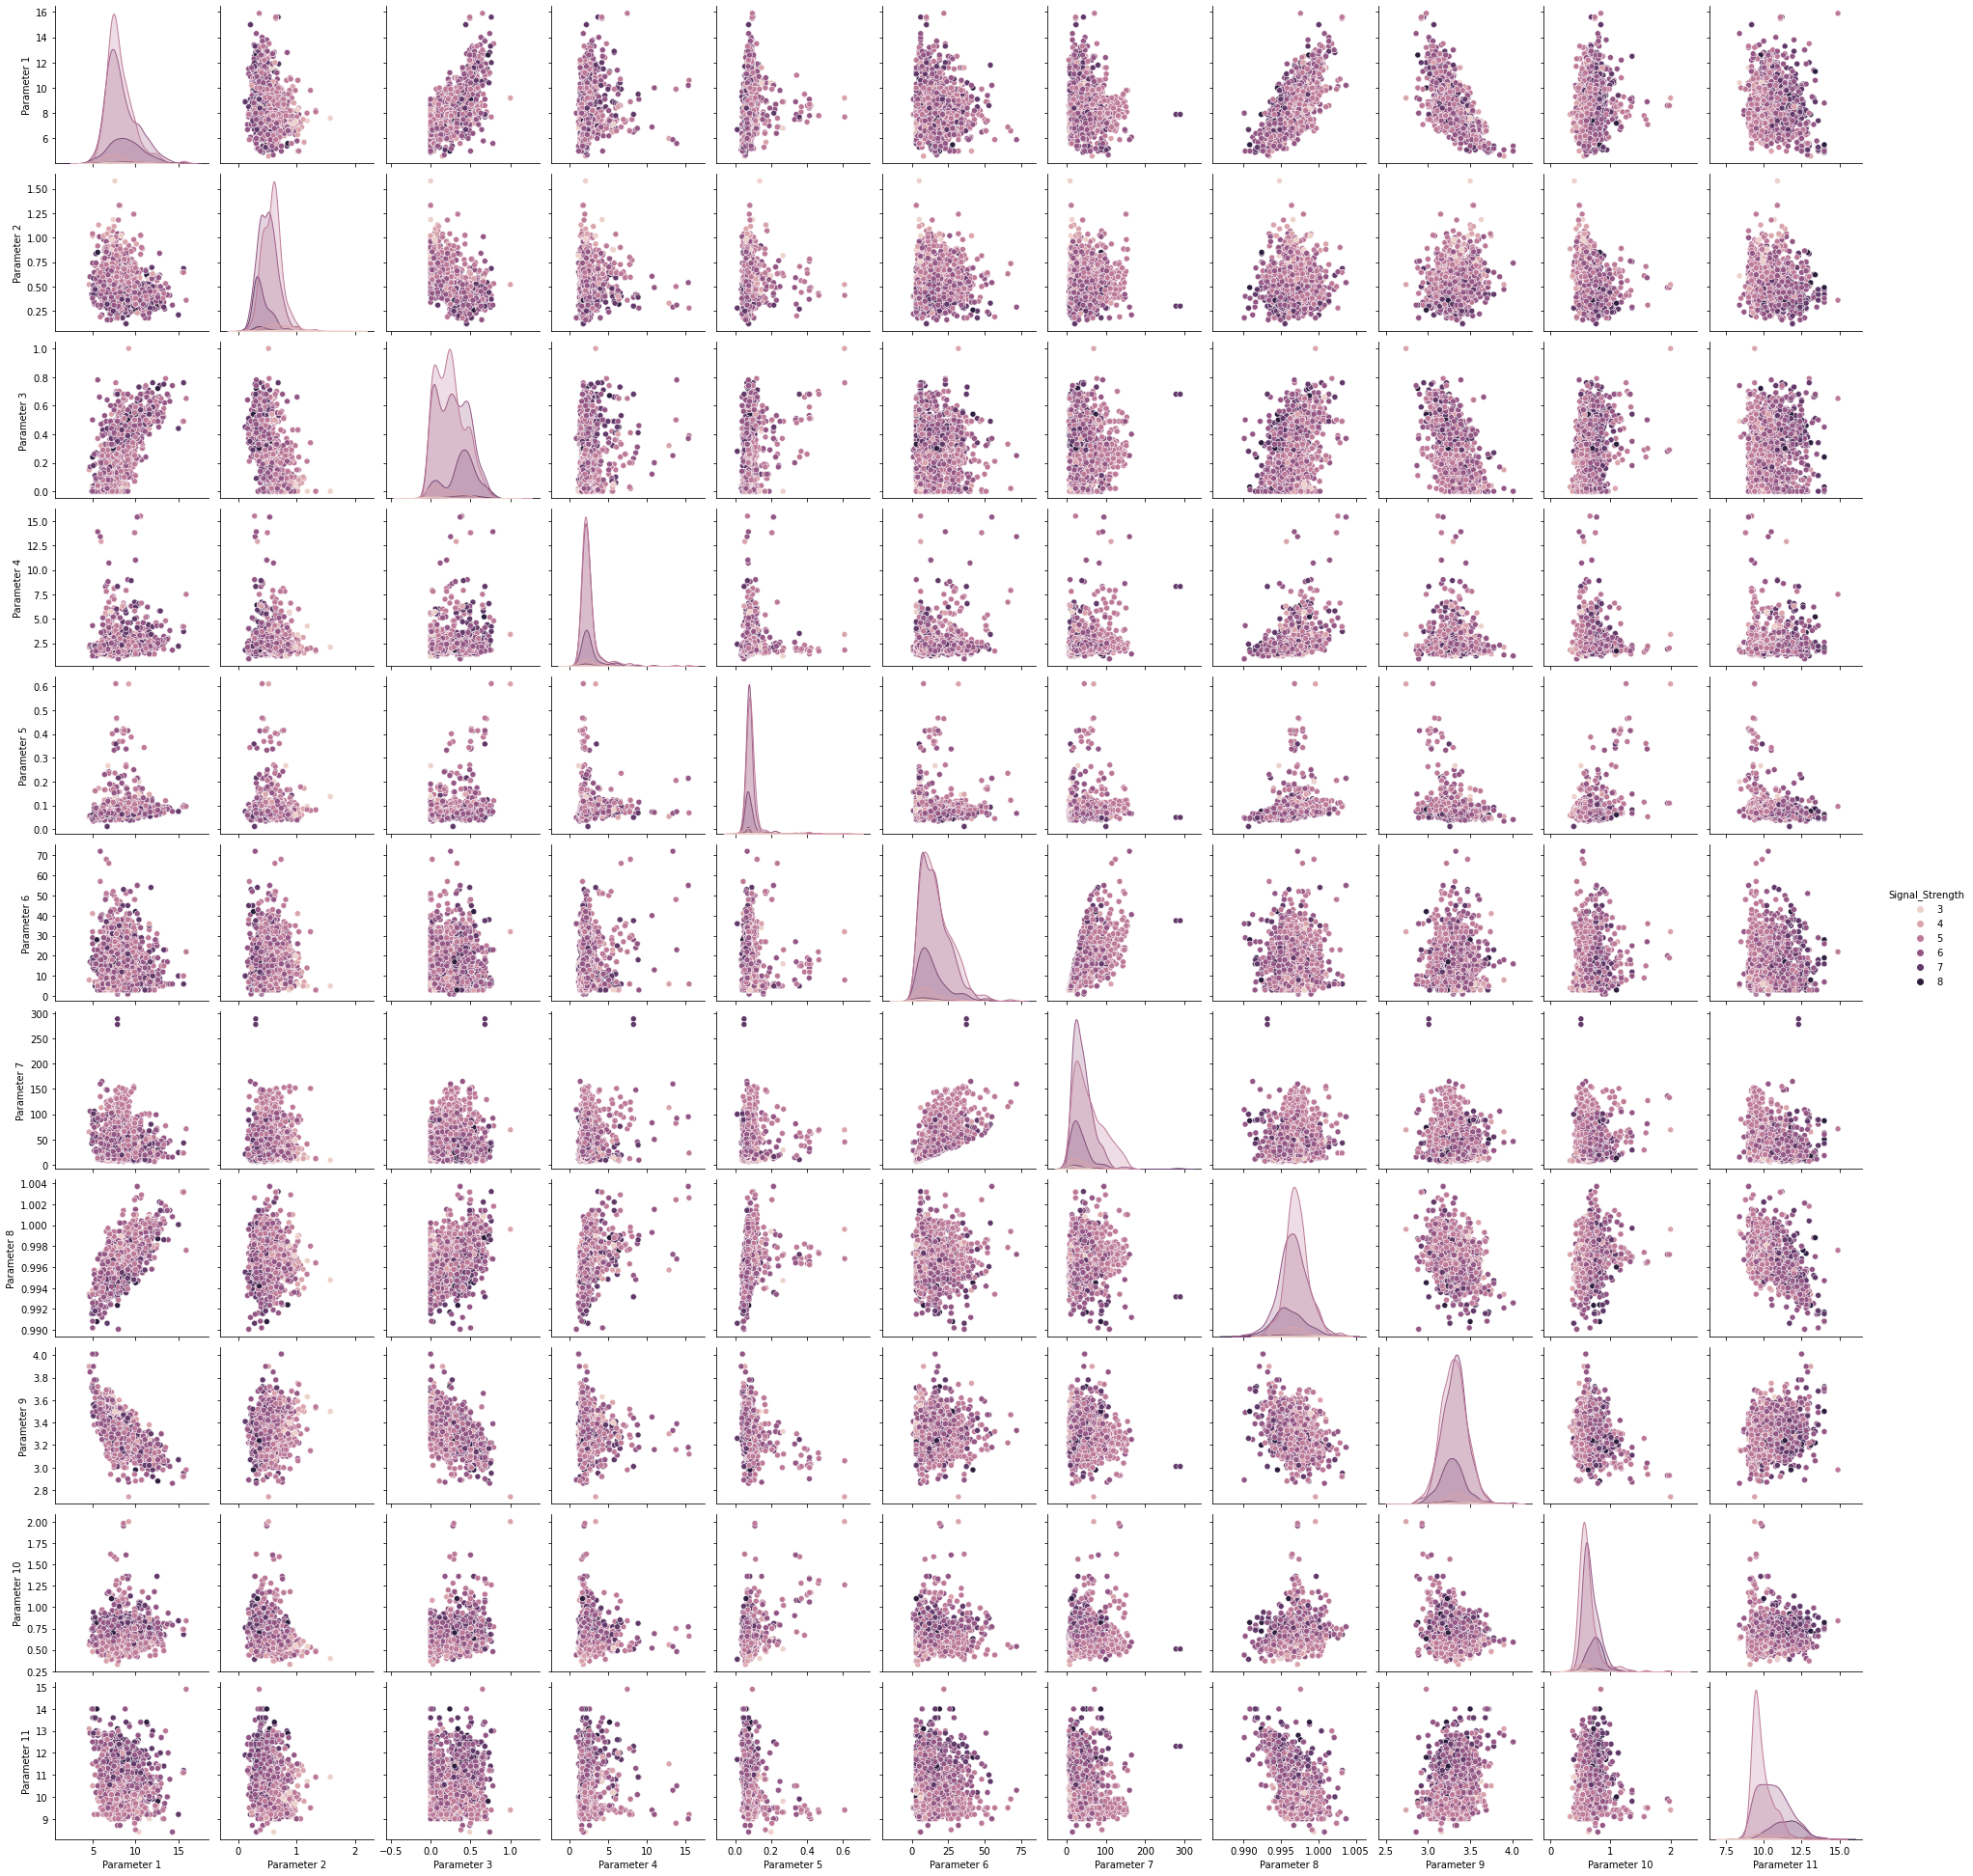

In [7]:

sns.pairplot(data,hue="Signal_Strength")

<AxesSubplot:>

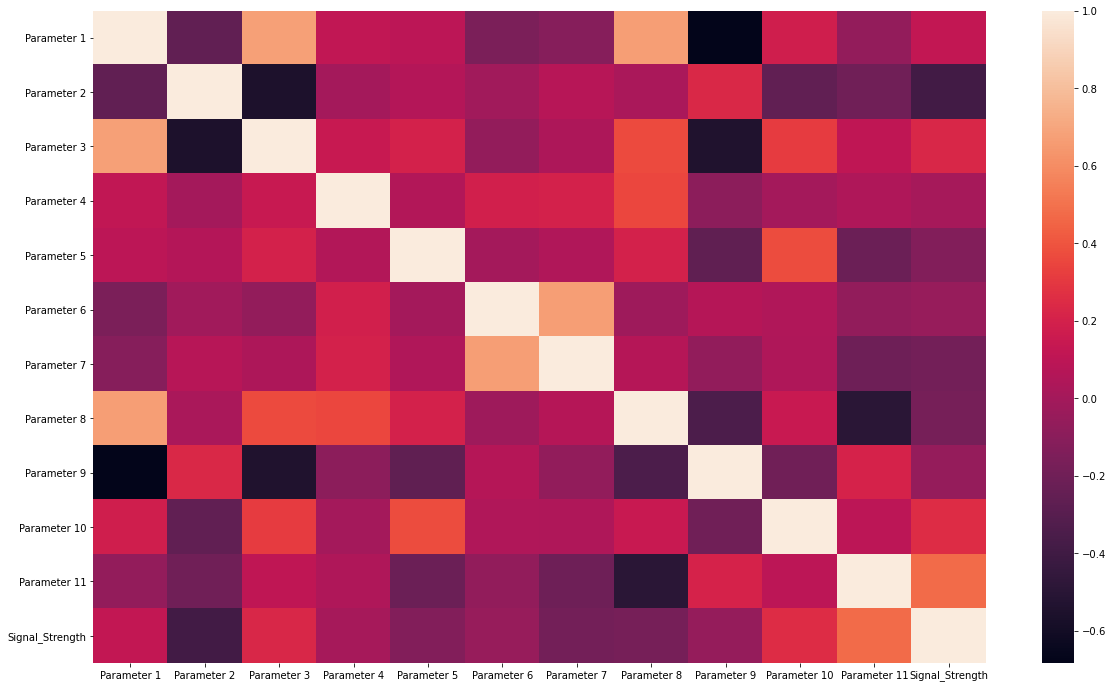

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr())

<AxesSubplot:>

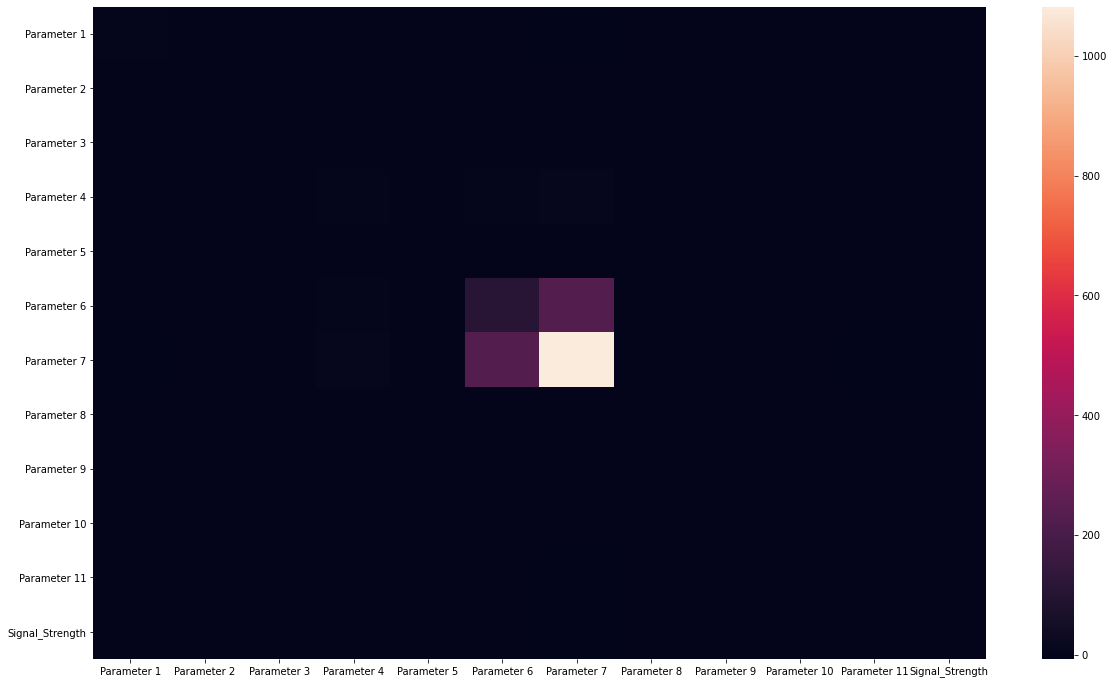

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(data.cov())

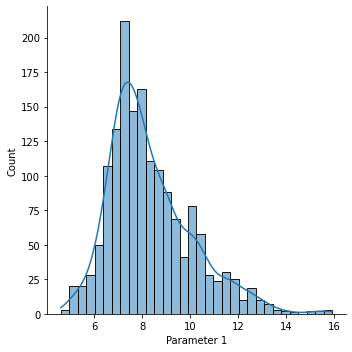

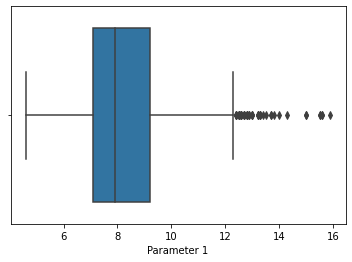

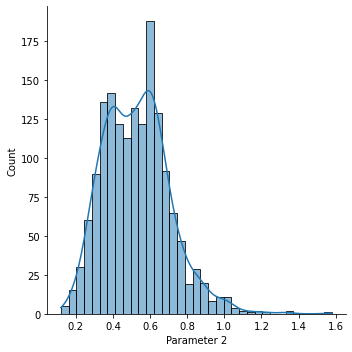

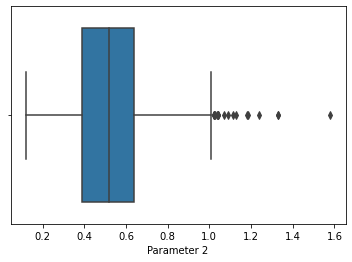

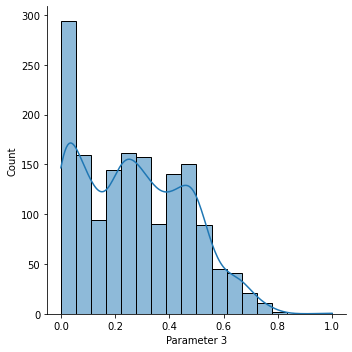

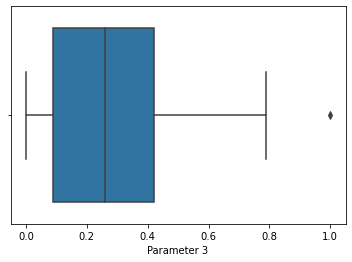

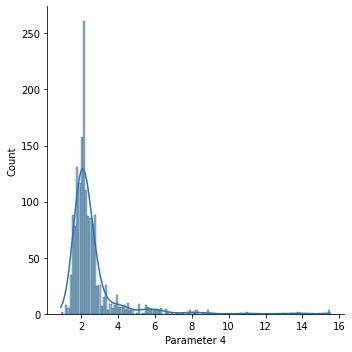

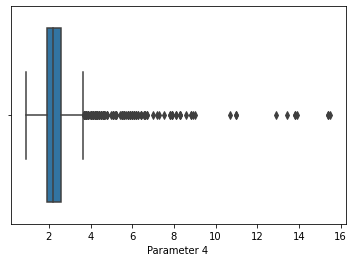

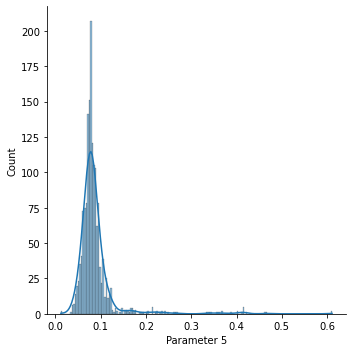

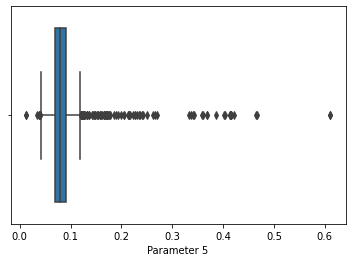

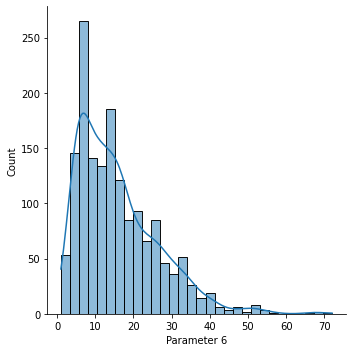

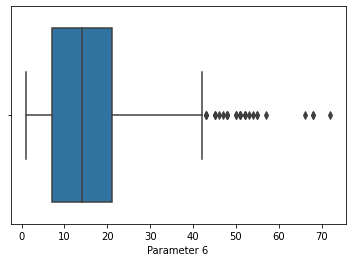

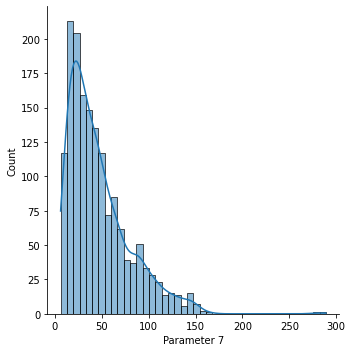

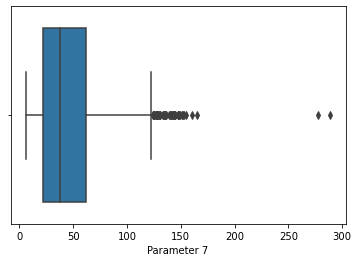

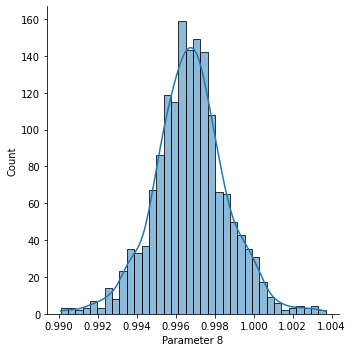

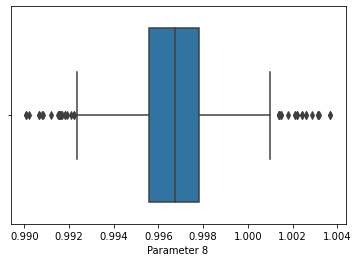

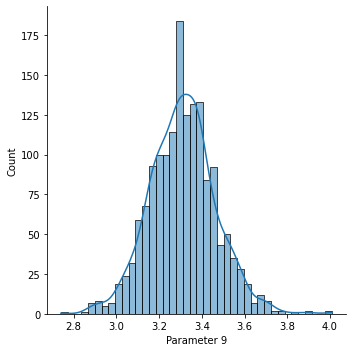

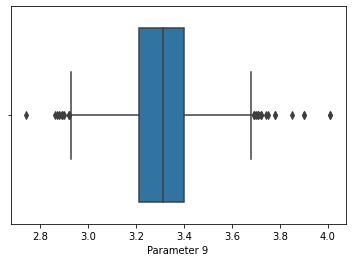

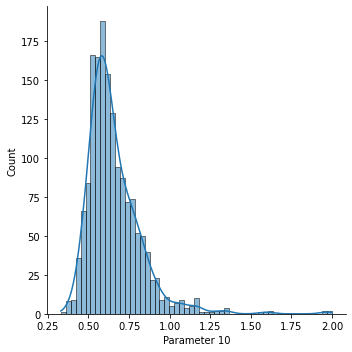

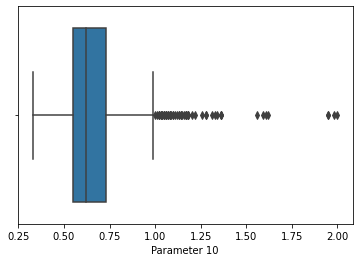

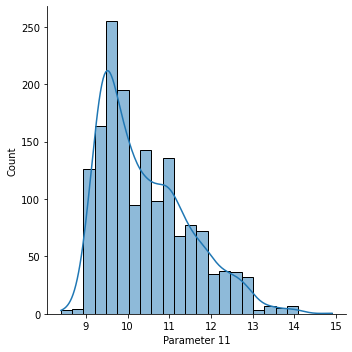

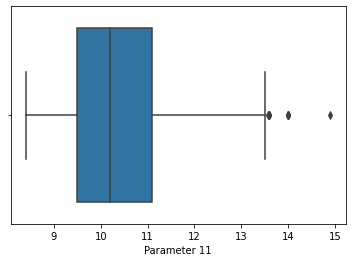

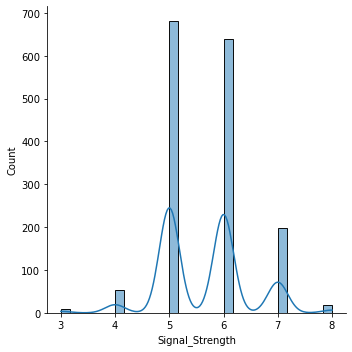

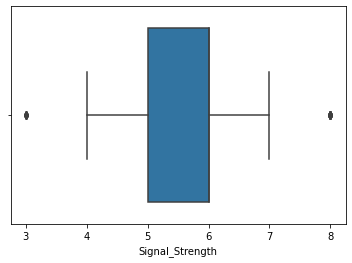

In [10]:
for each in data.columns:
    #plt.subplot(1,2,1)
    sns.displot(data=data[each],kde=True)
    plt.show()
    #plt.subplot(1,2,2)
    sns.boxplot(x=data[each])
    plt.show()
    plt.close()

In [11]:
data.dtypes


Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

Considering the parameters that are detected as outliers as simply the overdrives of the circuits given so that they are driven into some kind of resonance, we can replace them to understand and substitute for those outliers with the Quartiles.

In [12]:
data_org.describe()


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

In [13]:
###############################################################
#
###############################################################

def outlier_elimination(dataframe_given):
    dataframe=dataframe_given.copy()
    cols=dataframe.columns
    #######################################
    for col in cols:
        data=dataframe[col]
        maxpoint=dataframe.describe()[col]["max"]
        minpoint=dataframe.describe()[col]["min"]
        Q1=dataframe.describe()[col]["25%"]
        Q3=dataframe.describe()[col]["75%"]
        data[data<Q1]=Q1
        data[data>Q3]=Q3
    #####################################
    return dataframe
###############################################################
#
###############################################################        
data=outlier_elimination(data_org.drop("Signal_Strength",axis=1))
data["Signal_Strength"]=data_org["Signal_Strength"]

In [14]:
data.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.077486     0.516413     0.257455     2.227423     0.079728   
std       0.857963     0.102133     0.133717     0.285008     0.008013   
min       7.100000     0.390000     0.090000     1.900000     0.070000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max       9.200000     0.640000     0.420000     2.600000     0.090000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     13.881176    40.362101     0.996719     3.307223      0.633189   
std       5.641092    16.311374     0.000902     0.077528      0.072774   
min       7.000000    22.000000     0.995600     3.210000      0.550000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997833     3.400000      0.730000   
max      21.000000    62.000000     0.997835     3.400000      0.730000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.260851         5.636023  
std        0.657560         0.807569  
min        9.500000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       11.100000         8.000000

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

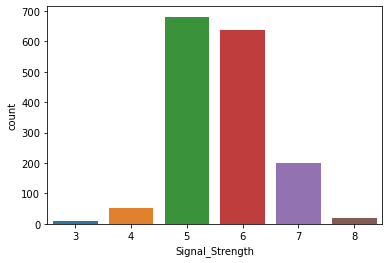

In [15]:
sns.countplot(x=data["Signal_Strength"])

In [16]:
data["Signal_Strength"]=data["Signal_Strength"].astype("category")

In [17]:
data.dtypes

Parameter 1         float64
Parameter 2         float64
Parameter 3         float64
Parameter 4         float64
Parameter 5         float64
Parameter 6         float64
Parameter 7         float64
Parameter 8         float64
Parameter 9         float64
Parameter 10        float64
Parameter 11        float64
Signal_Strength    category
dtype: object

<AxesSubplot:xlabel='Parameter 1', ylabel='Signal_Strength'>

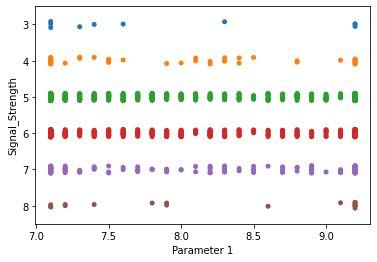

In [18]:
sns.stripplot(data=data,x="Parameter 1",y="Signal_Strength")

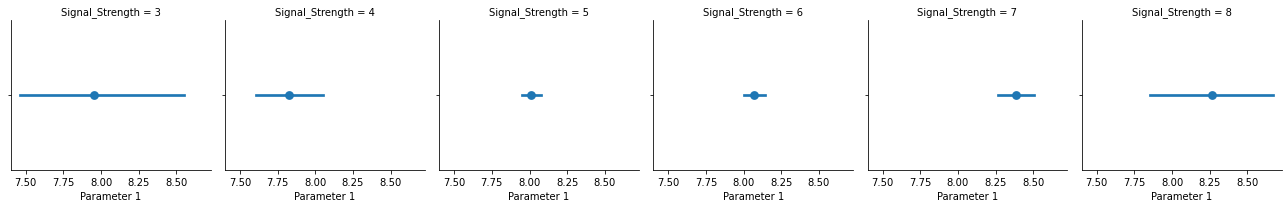

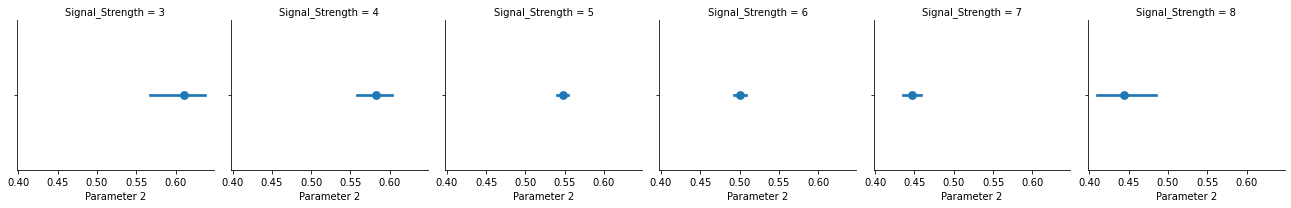

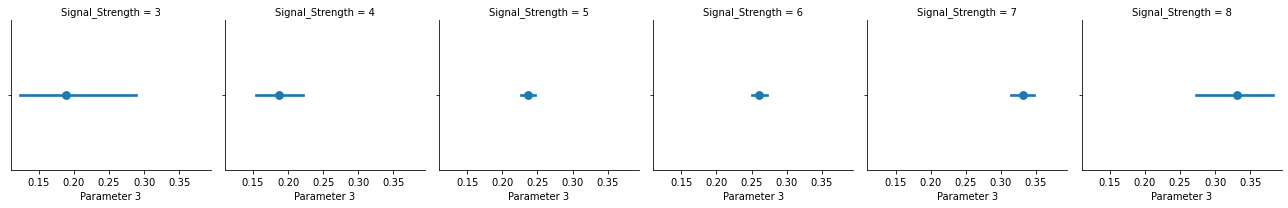

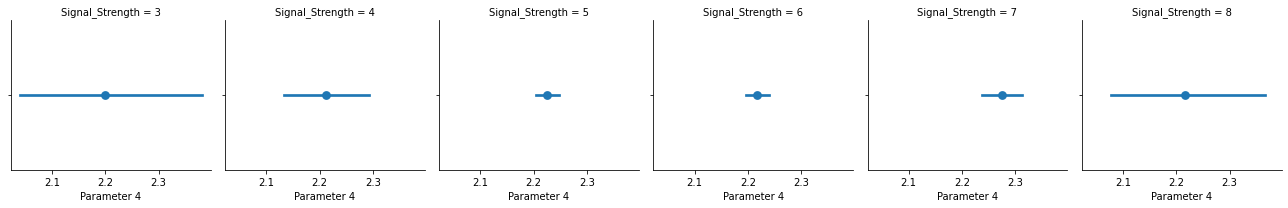

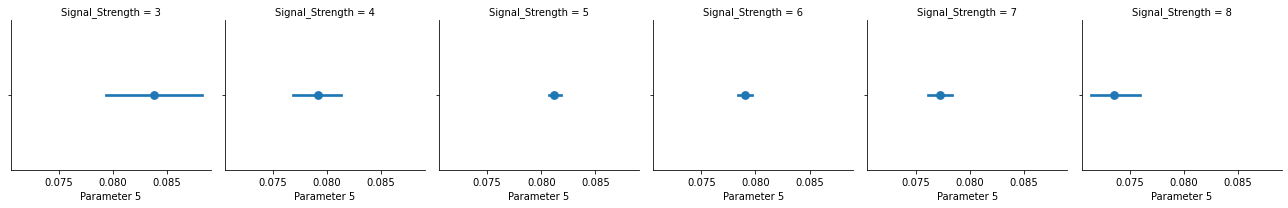

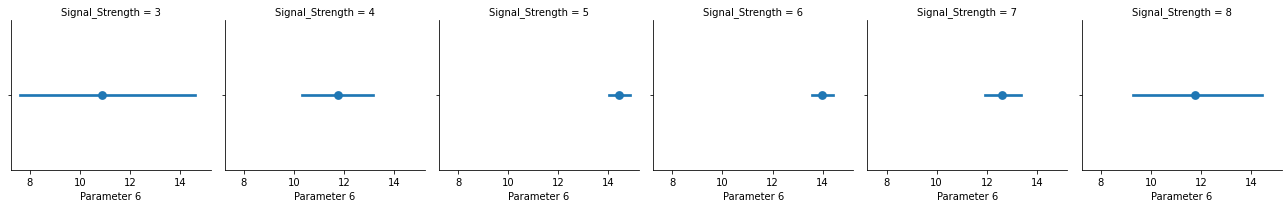

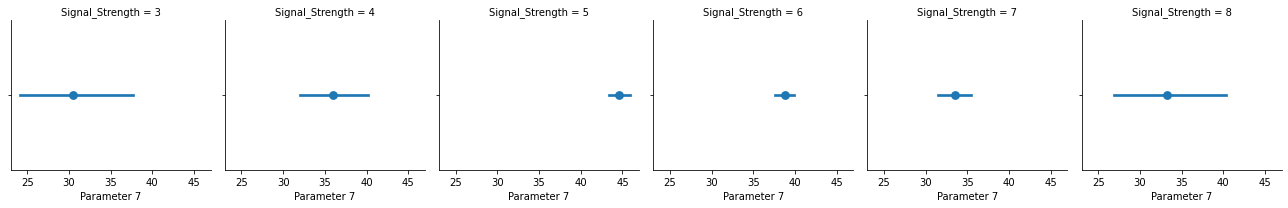

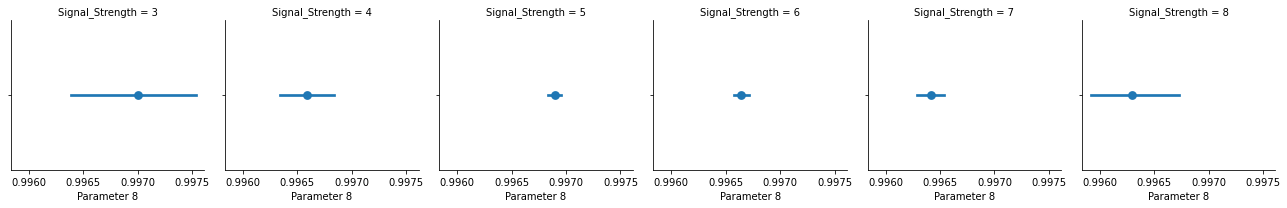

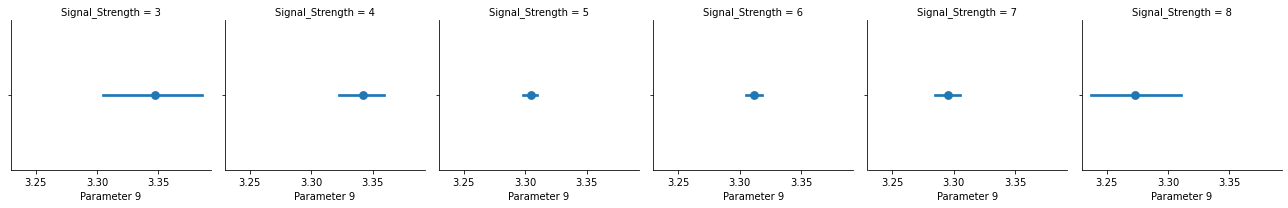

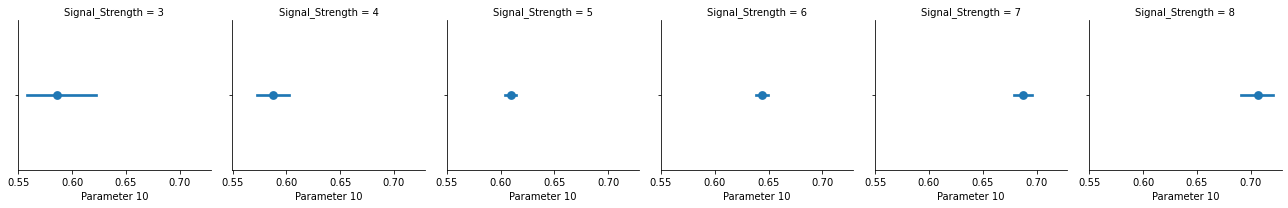

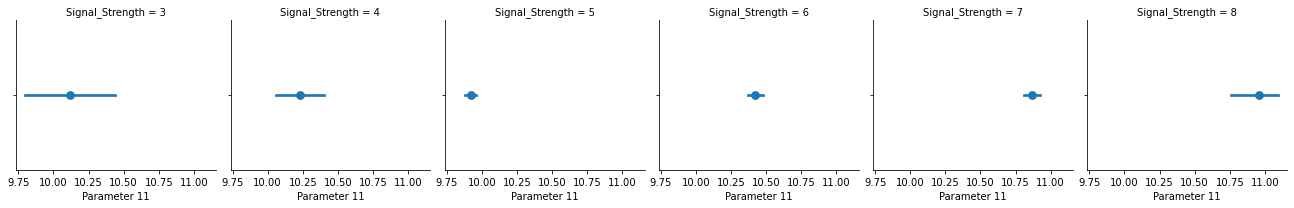

In [19]:
for each in data.columns.drop("Signal_Strength"):
    grid=sns.FacetGrid(data, col="Signal_Strength")
    grid.map(sns.pointplot,each)
    #grid.add_legend()

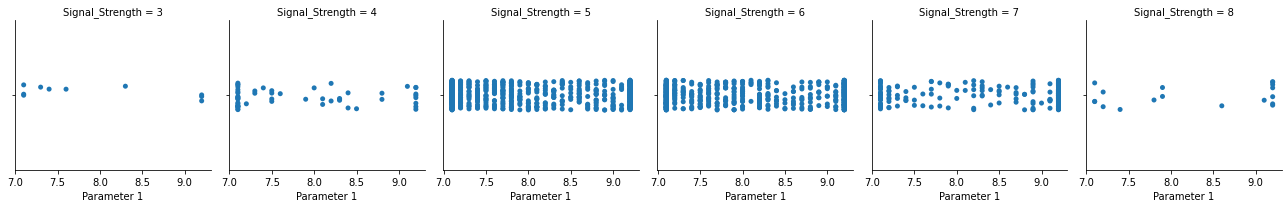

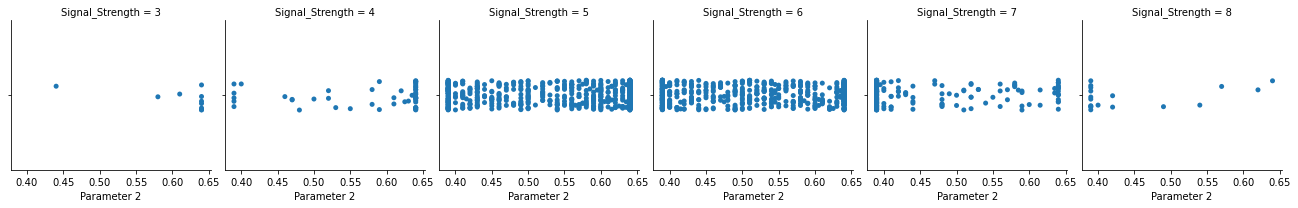

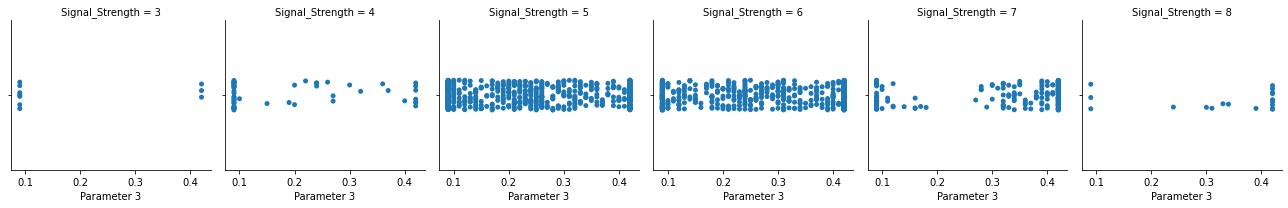

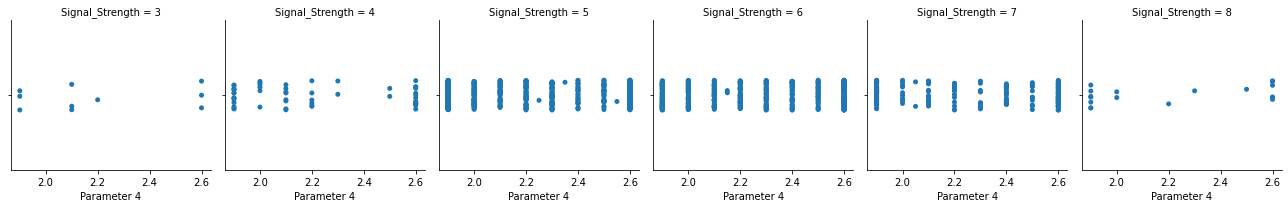

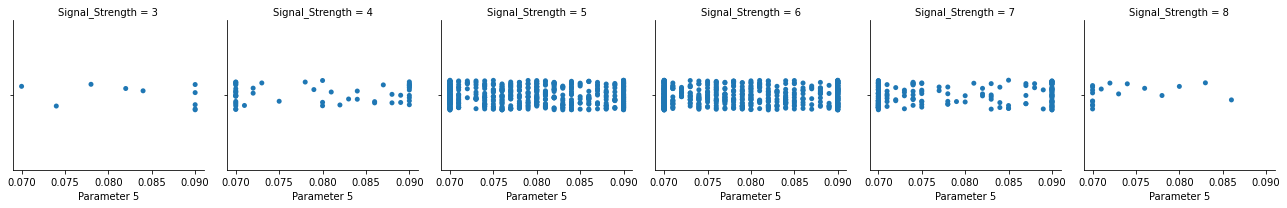

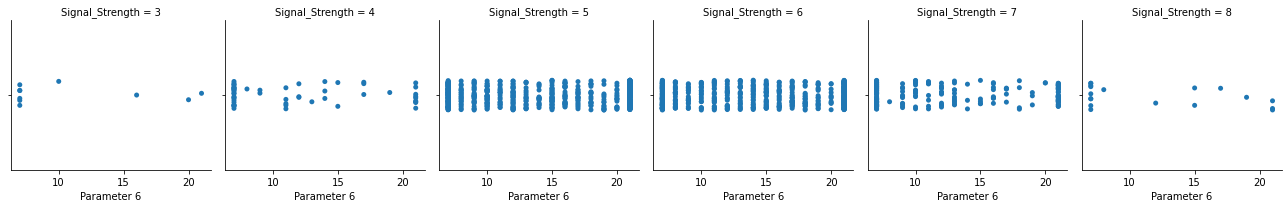

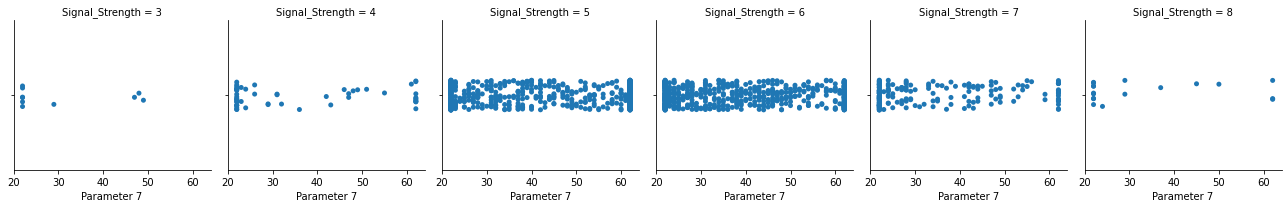

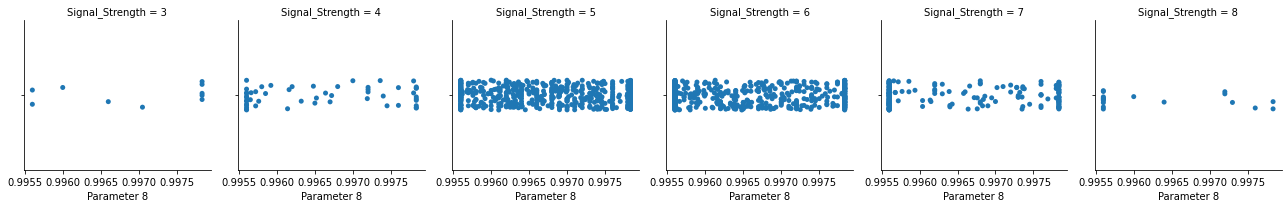

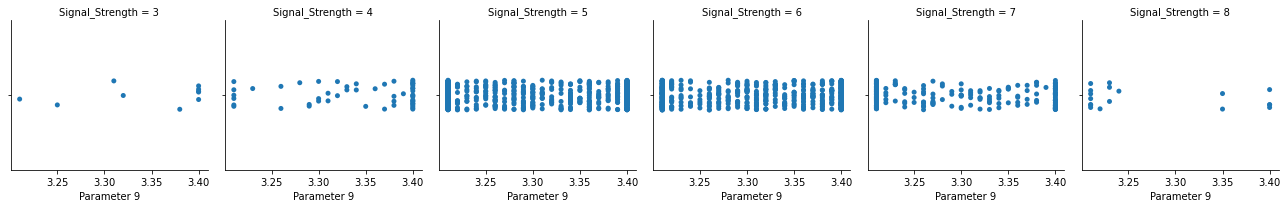

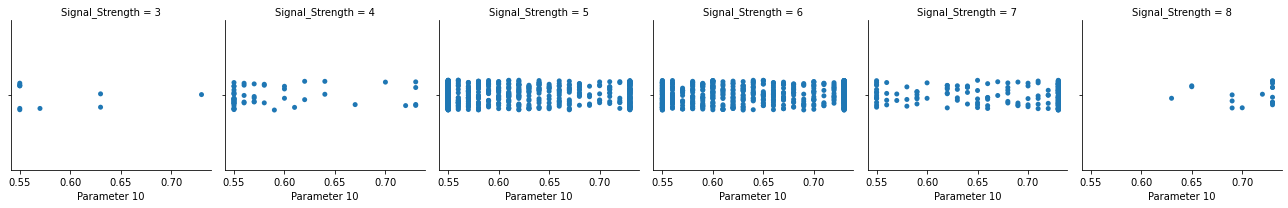

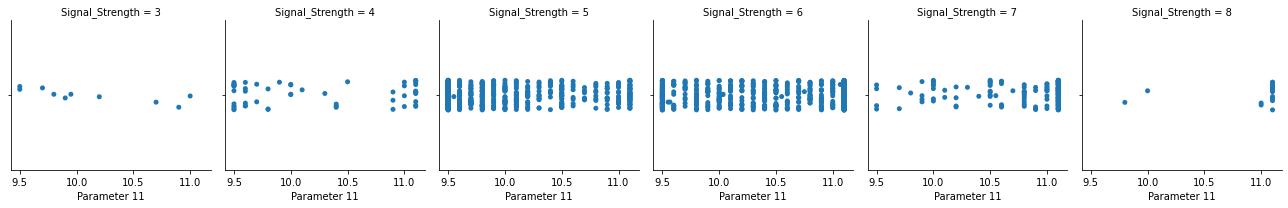

In [20]:
for each in data.columns.drop("Signal_Strength"):
    grid=sns.FacetGrid(data, col="Signal_Strength")
    grid.map(sns.stripplot,each)
    #grid.add_legend()

Looks like there is some particular orientations within the parameters that tend to go more towards right for higher qualtiy signals, on an average, and towards to the left for lower quality signals. The points, along with their mean points seem to be particularly oriented thus. We need to check it out by groupings.


In [21]:
data_groups=data.groupby("Signal_Strength")

In [22]:
data_groups.groups

{3: [459, 517, 690, 832, 899, 1299, 1374, 1469, 1478, 1505], 4: [18, 38, 41, 45, 73, 79, 94, 151, 161, 167, 170, 199, 224, 261, 266, 409, 573, 576, 600, 633, 647, 659, 703, 704, 724, 813, 830, 833, 872, 876, 927, 937, 1124, 1176, 1189, 1233, 1235, 1238, 1239, 1261, 1263, 1276, 1293, 1307, 1363, 1369, 1423, 1461, 1467, 1480, 1482, 1484, 1521], 5: [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 39, 40, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 96, 97, 98, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 152, 153, ...], 6: [3, 19, 20, 24, 29, 31, 33, 35, 36, 42, 51, 52, 54, 59, 69, 70, 77, 84, 86, 91, 95, 99, 100, 101, 102, 108, 113, 115, 116, 117, 118, 119, 121, 133, 134, 142, 144, 148, 149, 150, 159, 162, 168, 171, 172, 173, 177, 18

In [23]:
data_comparison_groups={}
for each in data_groups.groups:
    data_to={}
    temp=data_groups.get_group(each).describe().T
    #print(temp["mean"])
    data_to.update({'mean':temp["mean"],'std':temp["std"],'50%':temp["50%"]})
    data_comparison_groups.update({each:data_to})

In [24]:
data_comparison=pd.DataFrame(data_comparison_groups)

In [25]:
data_comparison.T

mean  \
3  Parameter 1      7.950000
Parameter 2      0.6...   
4  Parameter 1      7.828302
Parameter 2      0.5...   
5  Parameter 1      8.011013
Parameter 2      0.5...   
6  Parameter 1      8.069906
Parameter 2      0.5...   
7  Parameter 1      8.384925
Parameter 2      0.4...   
8  Parameter 1      8.266667
Parameter 2      0.4...   

                                                 std  \
3  Parameter 1      0.932440
Parameter 2      0.0...   
4  Parameter 1      0.803209
Parameter 2      0.0...   
5  Parameter 1      0.824984
Parameter 2      0.0...   
6  Parameter 1      0.872088
Parameter 2      0.0...   
7  Parameter 1      0.862211
Parameter 2      0.0...   
8  Parameter 1      0.923548
Parameter 2      0.0...   

                                                 50%  
3  Parameter 1      7.500000
Parameter 2      0.6...  
4  Parameter 1      7.5000
Parameter 2      0.640...  
5  Parameter 1      7.800
Parameter 2      0.580
...  
6  Parameter 1      7.90000
Parameter 2      0.49...  
7  Parameter 1      8.80000
Parameter 2      0.39...  
8  Parameter 1      8.2500
Parameter 2      0.390...

In [26]:
data_groups.groups

{3: [459, 517, 690, 832, 899, 1299, 1374, 1469, 1478, 1505], 4: [18, 38, 41, 45, 73, 79, 94, 151, 161, 167, 170, 199, 224, 261, 266, 409, 573, 576, 600, 633, 647, 659, 703, 704, 724, 813, 830, 833, 872, 876, 927, 937, 1124, 1176, 1189, 1233, 1235, 1238, 1239, 1261, 1263, 1276, 1293, 1307, 1363, 1369, 1423, 1461, 1467, 1480, 1482, 1484, 1521], 5: [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 39, 40, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 96, 97, 98, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 152, 153, ...], 6: [3, 19, 20, 24, 29, 31, 33, 35, 36, 42, 51, 52, 54, 59, 69, 70, 77, 84, 86, 91, 95, 99, 100, 101, 102, 108, 113, 115, 116, 117, 118, 119, 121, 133, 134, 142, 144, 148, 149, 150, 159, 162, 168, 171, 172, 173, 177, 18

In [27]:
pd.DataFrame(data_comparison[3]["mean"])

mean
Parameter 1    7.950000
Parameter 2    0.611000
Parameter 3    0.189000
Parameter 4    2.200000
Parameter 5    0.083800
Parameter 6   10.900000
Parameter 7   30.500000
Parameter 8    0.997003
Parameter 9    3.347000
Parameter 10   0.586000
Parameter 11  10.115000

In [28]:
dataframe_taken={}
for cate in data_comparison.T.columns:
    temp=pd.DataFrame()
    temp2=pd.DataFrame()
    for each in data_groups.groups:
        print(cate,each)
        print(data_comparison[each][cate])
        #print(data_comparison[each][cate])
        temp[each]=data_comparison[each][cate]
        #temp
        #temp2[cate]=data_comparison[cate][each]
        #print(data_comparison[each][cate])
        print(temp[each])
        #print(temp2[cate])
        #print(each)
    print(" \ntoken end\n")
    dataframe_taken.update({cate : temp})
       

mean 3
Parameter 1      7.950000
Parameter 2      0.611000
Parameter 3      0.189000
Parameter 4      2.200000
Parameter 5      0.083800
Parameter 6     10.900000
Parameter 7     30.500000
Parameter 8      0.997003
Parameter 9      3.347000
Parameter 10     0.586000
Parameter 11    10.115000
Name: mean, dtype: float64
Parameter 1      7.950000
Parameter 2      0.611000
Parameter 3      0.189000
Parameter 4      2.200000
Parameter 5      0.083800
Parameter 6     10.900000
Parameter 7     30.500000
Parameter 8      0.997003
Parameter 9      3.347000
Parameter 10     0.586000
Parameter 11    10.115000
Name: 3, dtype: float64
mean 4
Parameter 1      7.828302
Parameter 2      0.581887
Parameter 3      0.186415
Parameter 4      2.211321
Parameter 5      0.079189
Parameter 6     11.735849
Parameter 7     35.943396
Parameter 8      0.996592
Parameter 9      3.342075
Parameter 10     0.587170
Parameter 11    10.232075
Name: mean, dtype: float64
Parameter 1      7.828302
Parameter 2      0.58188

In [29]:
dataframe_taken["std"] #Standard Deviations for varios parameters arranged according to the mean of the corresponding signal strength

3          4          5          6          7          8
Parameter 1    0.932440   0.803209   0.824984   0.872088   0.862211   0.923548
Parameter 2    0.063325   0.086632   0.095784   0.098658   0.086270   0.087058
Parameter 3    0.159405   0.126340   0.126095   0.135109   0.123907   0.123378
Parameter 4    0.294392   0.283291   0.290032   0.279508   0.280371   0.322217
Parameter 5    0.007569   0.008560   0.007699   0.007901   0.008376   0.005056
Parameter 6    5.801341   5.360651   5.641878   5.599191   5.469371   5.816362
Parameter 7   12.276898  16.300561  16.778541  15.353264  13.875599  15.667710
Parameter 8    0.000976   0.000894   0.000835   0.000923   0.000928   0.000908
Parameter 9    0.071032   0.066372   0.078013   0.077105   0.075971   0.081746
Parameter 10   0.060222   0.056513   0.067485   0.070017   0.061385   0.033255
Parameter 11   0.562756   0.667882   0.536666   0.633817   0.412148   0.386876

In [30]:
dataframe_taken["std"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3     0.932440     0.063325     0.159405     0.294392     0.007569   
4     0.803209     0.086632     0.126340     0.283291     0.008560   
5     0.824984     0.095784     0.126095     0.290032     0.007699   
6     0.872088     0.098658     0.135109     0.279508     0.007901   
7     0.862211     0.086270     0.123907     0.280371     0.008376   
8     0.923548     0.087058     0.123378     0.322217     0.005056   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3     5.801341    12.276898     0.000976     0.071032      0.060222   
4     5.360651    16.300561     0.000894     0.066372      0.056513   
5     5.641878    16.778541     0.000835     0.078013      0.067485   
6     5.599191    15.353264     0.000923     0.077105      0.070017   
7     5.469371    13.875599     0.000928     0.075971      0.061385   
8     5.816362    15.667710     0.000908     0.081746      0.033255   

   Parameter 11  
3      0.562756  
4      0.667882  
5      0.536666  
6      0.633817  
7      0.412148  
8      0.386876

In [31]:
dataframe_taken["mean"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3     7.950000     0.611000     0.189000     2.200000     0.083800   
4     7.828302     0.581887     0.186415     2.211321     0.079189   
5     8.011013     0.547283     0.237269     2.225330     0.081222   
6     8.069906     0.500462     0.260940     2.216771     0.079052   
7     8.384925     0.446231     0.331055     2.275377     0.077286   
8     8.266667     0.444444     0.331111     2.216667     0.073500   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3    10.900000    30.500000     0.997003     3.347000      0.586000   
4    11.735849    35.943396     0.996592     3.342075      0.587170   
5    14.430250    44.566814     0.996895     3.304258      0.609354   
6    13.973354    38.750784     0.996644     3.311614      0.644232   
7    12.618090    33.457286     0.996414     3.295075      0.687337   
8    11.777778    33.222222     0.996298     3.273333      0.706667   

   Parameter 11  
3     10.115000  
4     10.232075  
5      9.920485  
6     10.420455  
7     10.866080  
8     10.955556

In [32]:
dataframe_taken["50%"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3         7.50         0.64        0.090          2.1       0.0870   
4         7.50         0.64        0.090          2.1       0.0800   
5         7.80         0.58        0.230          2.2       0.0810   
6         7.90         0.49        0.260          2.2       0.0780   
7         8.80         0.39        0.400          2.3       0.0730   
8         8.25         0.39        0.405          2.1       0.0705   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3          7.0         22.0     0.997443         3.39          0.55   
4         11.0         26.0     0.996500         3.37          0.56   
5         15.0         47.0     0.997000         3.30          0.58   
6         14.0         35.0     0.996560         3.32          0.64   
7         11.0         27.0     0.995770         3.28          0.73   
8          7.5         23.0     0.995600         3.23          0.73   

   Parameter 11  
3         9.925  
4        10.000  
5         9.700  
6        10.500  
7        11.100  
8        11.100

<function matplotlib.pyplot.show(close=None, block=None)>

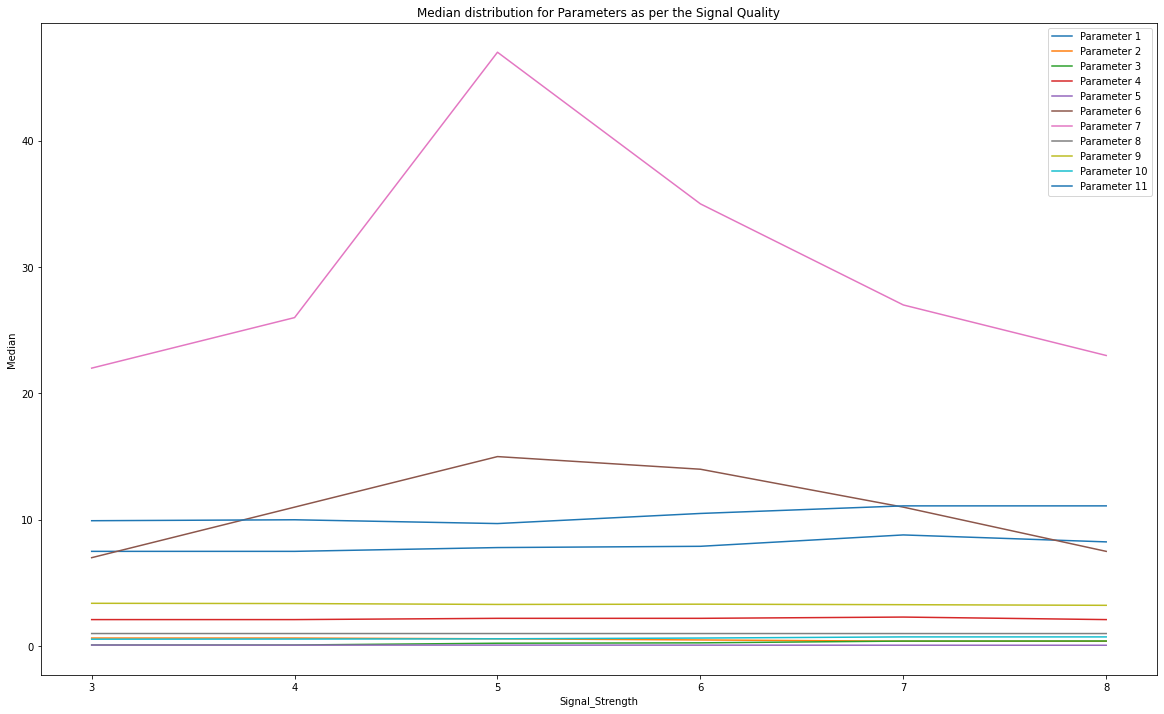

In [33]:
plt.figure(figsize=(20,12))
plt.title("Median distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Median")
plt.plot(dataframe_taken["50%"].T)
plt.legend(dataframe_taken["50%"].T.columns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

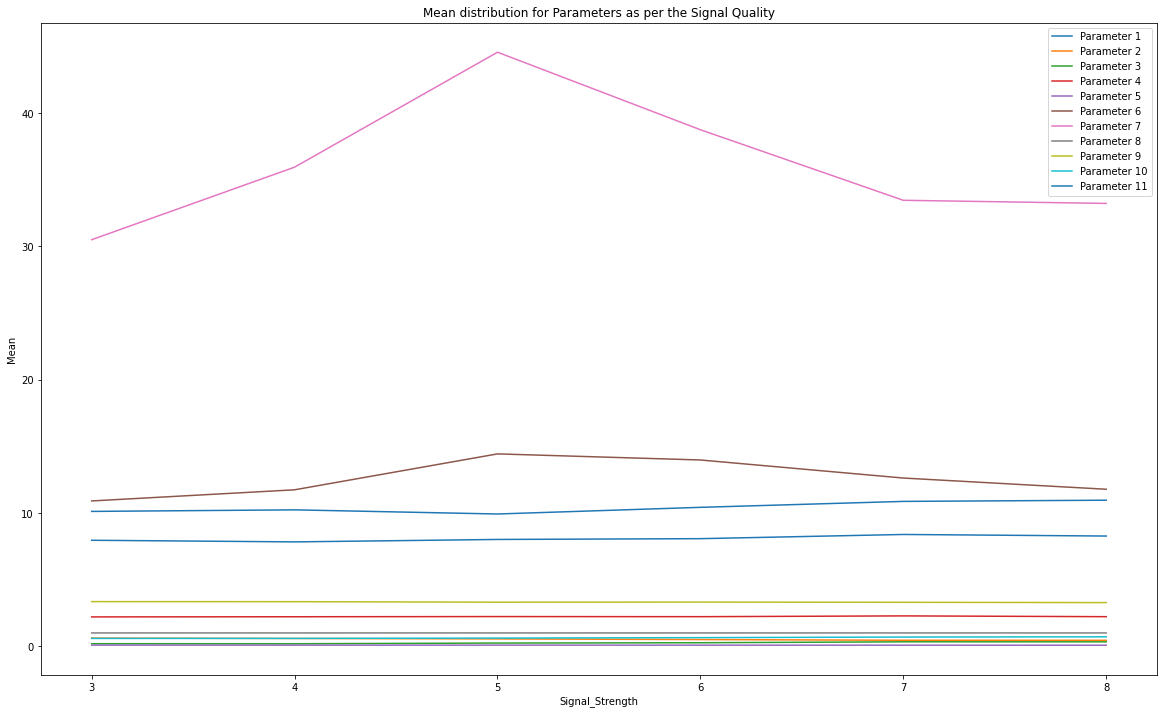

In [34]:
plt.figure(figsize=(20,12))
plt.title("Mean distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Mean")
plt.plot(dataframe_taken["mean"].T)
plt.legend(dataframe_taken["mean"].T.columns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

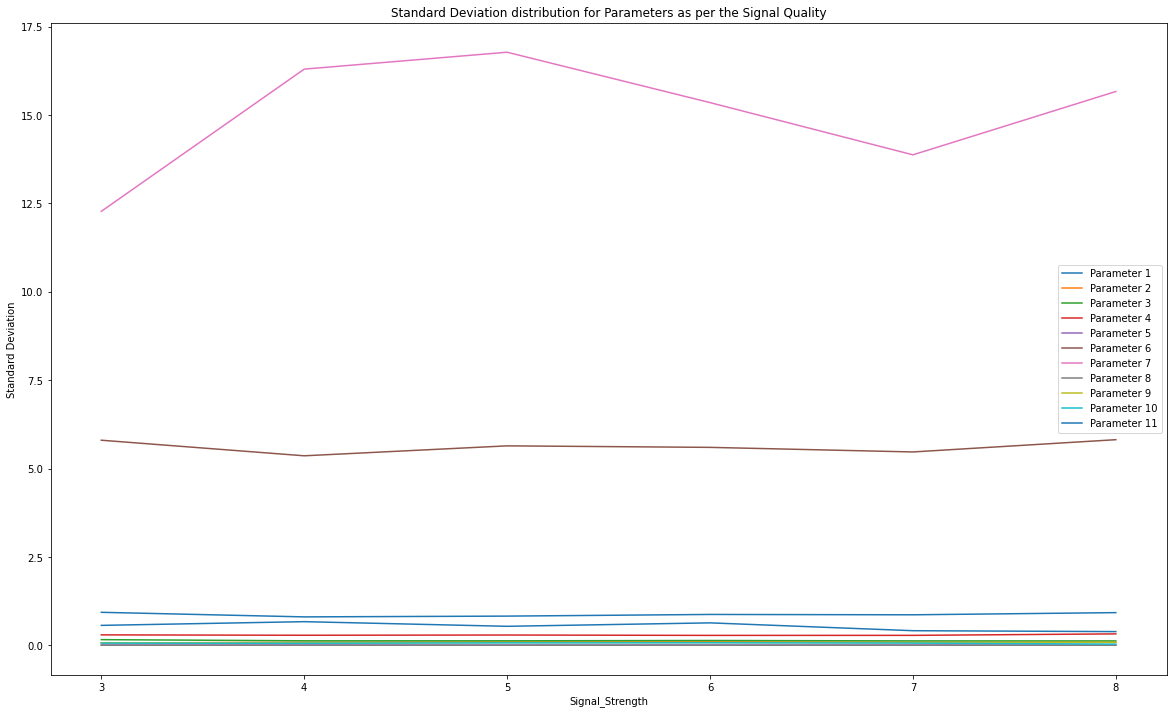

In [35]:
plt.figure(figsize=(20,12))
plt.title("Standard Deviation distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Standard Deviation")
plt.plot(dataframe_taken["std"].T)
plt.legend(dataframe_taken["std"].T.columns)
plt.show

In [36]:
data2=data.drop(["Signal_Strength"],axis=1)

In [37]:
data2.corr()[(data2.corr()>0.6) | (data2.corr()<-0.6)]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
Parameter 1      1.000000          NaN     0.637751          NaN          NaN   
Parameter 2           NaN     1.000000    -0.639238          NaN          NaN   
Parameter 3      0.637751    -0.639238     1.000000          NaN          NaN   
Parameter 4           NaN          NaN          NaN          1.0          NaN   
Parameter 5           NaN          NaN          NaN          NaN          1.0   
Parameter 6           NaN          NaN          NaN          NaN          NaN   
Parameter 7           NaN          NaN          NaN          NaN          NaN   
Parameter 8           NaN          NaN          NaN          NaN          NaN   
Parameter 9     -0.655172          NaN          NaN          NaN          NaN   
Parameter 10          NaN          NaN          NaN          NaN          NaN   
Parameter 11          NaN          NaN          NaN          NaN          NaN   

              Parameter 6  Parameter 7  Parameter 8  Parameter 9  \
Parameter 1           NaN          NaN          NaN    -0.655172   
Parameter 2           NaN          NaN          NaN          NaN   
Parameter 3           NaN          NaN          NaN          NaN   
Parameter 4           NaN          NaN          NaN          NaN   
Parameter 5           NaN          NaN          NaN          NaN   
Parameter 6      1.000000     0.751993          NaN          NaN   
Parameter 7      0.751993     1.000000          NaN          NaN   
Parameter 8           NaN          NaN          1.0          NaN   
Parameter 9           NaN          NaN          NaN     1.000000   
Parameter 10          NaN          NaN          NaN          NaN   
Parameter 11          NaN          NaN          NaN          NaN   

              Parameter 10  Parameter 11  
Parameter 1            NaN           NaN  
Parameter 2            NaN           NaN  
Parameter 3            NaN           NaN  
Parameter 4            NaN           NaN  
Parameter 5            NaN           NaN  
Parameter 6            NaN           NaN  
Parameter 7            NaN           NaN  
Parameter 8            NaN           NaN  
Parameter 9            NaN           NaN  
Parameter 10           1.0           NaN  
Parameter 11           NaN           1.0

Parameter 2 has no correlation with any of the other parameters. So, it looks like a real independent and non-redundant column and hence of crucial and very important. But the distribution plot of the parameters indicates otherwise stating that most probably the parameter doesn't play any role at all in determining whether the Signal has proper strength or not.

The same Story aplies for Parameter 4 and Parameter 5. Scatterplots speak the same in this case too.

Most of the action seems to be happening with Parameter 1, in connection with Parameter8, Parameter8, Parameter9.

In [38]:
parameter_interest1=["Parameter 1", "Parameter 3", "Parameter 6", "Parameter 7", "Parameter 8", "Parameter 9"]
parameter_other=data2.columns.drop(parameter_interest1)

In [39]:
parameter_other

Index(['Parameter 2', 'Parameter 4', 'Parameter 5', 'Parameter 10',
       'Parameter 11'],
      dtype='object')

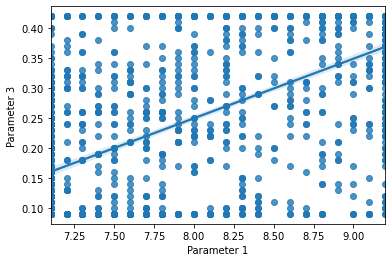

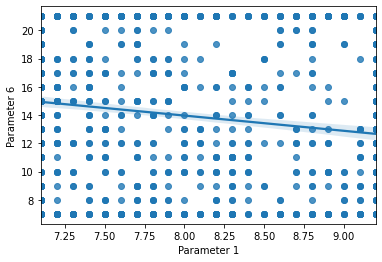

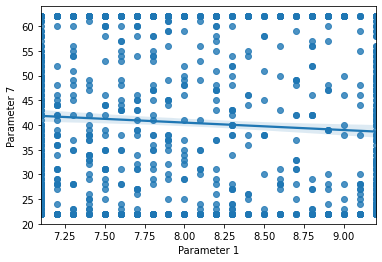

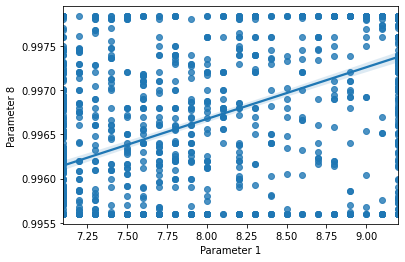

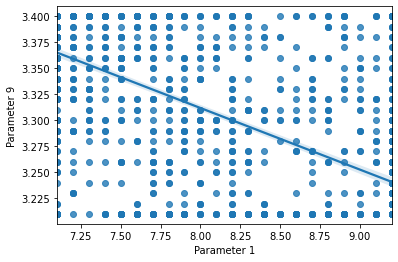

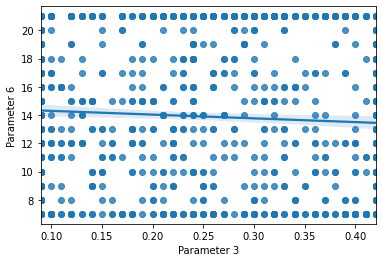

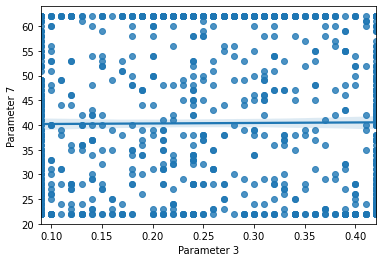

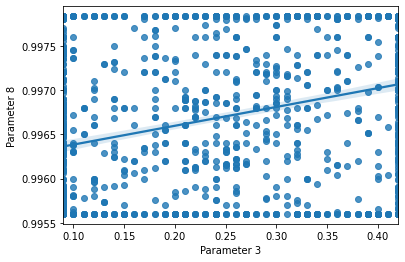

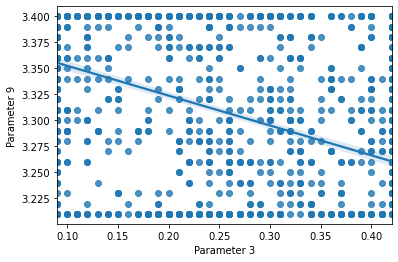

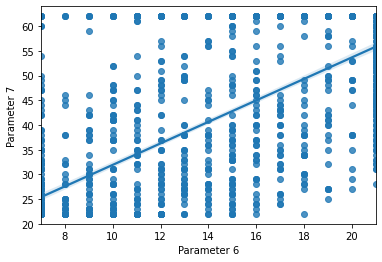

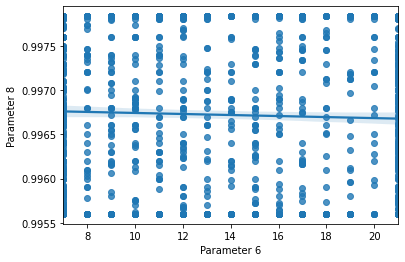

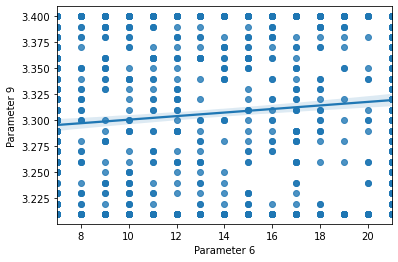

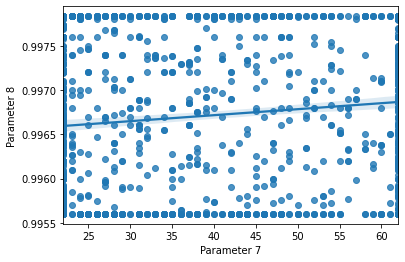

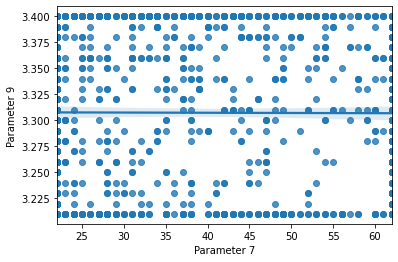

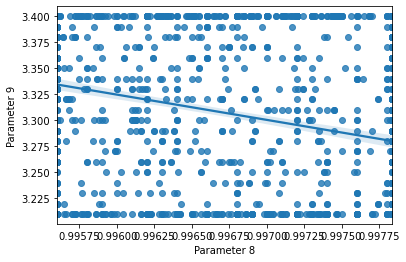

In [40]:
for each1,each2 in itertools.combinations(parameter_interest1,2):
    sns.regplot(x=data[each1],y=data[each2])
    plt.show()
    plt.close() # None of the functions are completely nonlinear.

<AxesSubplot:title={'center':'Correlation Measurement'}>

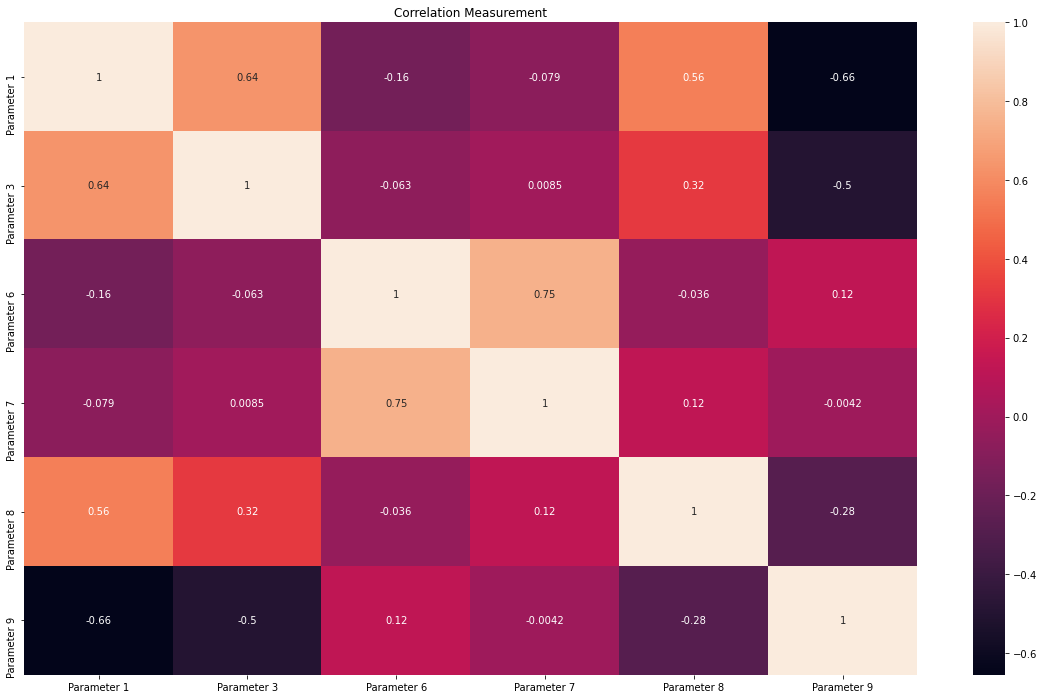

In [41]:
plt.figure(figsize=(20,12))
plt.title("Correlation Measurement")
sns.heatmap(data2[parameter_interest1].corr(),annot=True)

<AxesSubplot:title={'center':'Correlation Measurement'}>

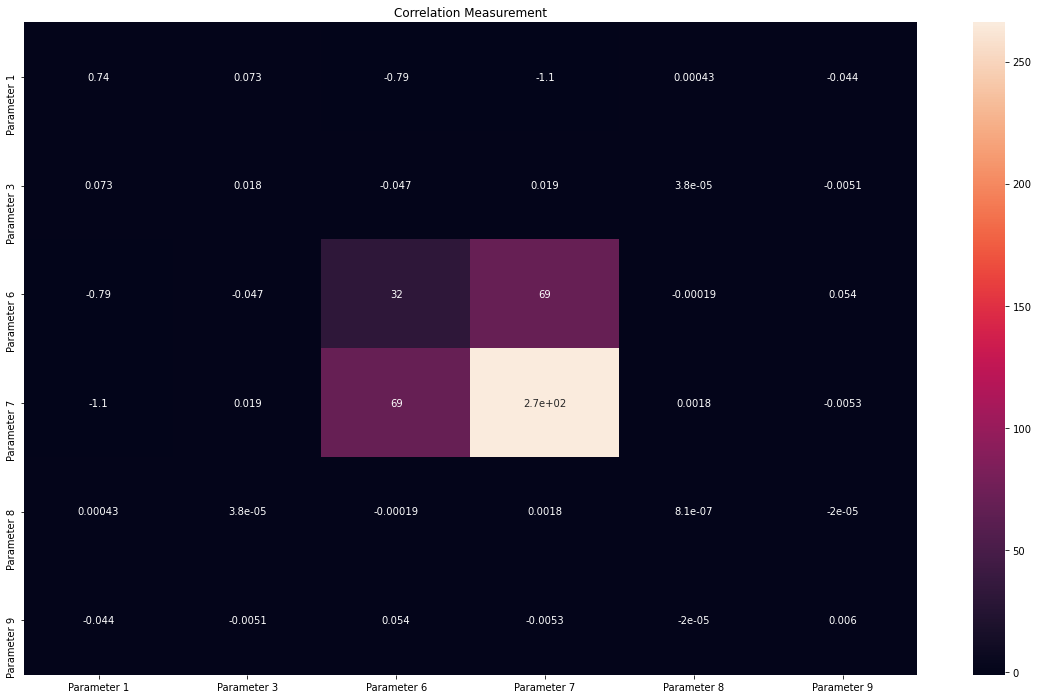

In [42]:
plt.figure(figsize=(20,12))
plt.title("Correlation Measurement")
sns.heatmap(data2[parameter_interest1].cov(),annot=True)

Thre is a only a very little difference between using Neural Network as a regressor and Neural network as a classifier. Only the output layer and the softmax function that changes the scenario. So,keeping that in the mind, we can first go for training it as a regressor, then we can make a small modification to our original data and make it as an classifier column and then go for the classifier Neural Network.


**please note**

Please note that the Object Oriented approach and the classification has been avoided completely and the process is simplified a lot. The approach is shifted to the part3 of the project where it becomes a necessity to go for class approach.
The first two parts of the project that we are dealing with here are considered as a starting point, a stepping stone, for the part3 of the project. Hence, from the point of view of maximum flexibility and freedom from my perspective, it has been thought that these models will be envisaged to be used in that file as it is.

**Approach Taken**

Though there went a number of trials into developing these models, all of them are not noted or continued here. So, there are three trials with respect to both categorical and regressional approach to the data.

First Trial is without the validation set involved.
Second trial is with the validation set invovled.
Third trial is the performance metrics after performing some PCA because we saw some dimensions were pretty useless so, reduce the dimensions in the data and take thes same again.
Fourth trial is nothing but one of the samples of the iterations that I took i.e. things like changing the number of layers, the batch size, the number of epochs etc. 

In [43]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as k
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape, BatchNormalization, Dropout

In [44]:
X_train1, X_valid, y_train1, y_valid = train_test_split(data.drop("Signal_Strength",axis=1), data["Signal_Strength"], random_state=0)

In [45]:
######################################################
# Function Converting predicted probabilities into class labels.
######################################################
def convert_to_class_labels(y_predicted):
    class_predicted=[]
    y_pred=y_predicted
    class_labels=y_pred.shape[1]
    for each in y_pred :
        array=each
        for n in range(len(array)):
            if array[n]==array.max():
                class_predicted.append(n)
    return class_predicted
########################################################
#
#######################################################

# Categorical Neural Network - Trial 1

In [46]:

###################################################################
#Categorical Neural Network
###################################################################
model_cat_1=k.Sequential()
#model_cat_1.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_1.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_1.add(BatchNormalization())
model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(60,)))
model_cat_1.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(60,)))
model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.4, input_shape=(60,)))
model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(30,)))
model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(30,)))
model_cat_1.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_1.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_1=model_cat_1.fit(X_train1,k.utils.to_categorical(y_train1),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 1ms/step - loss: 0.2816 - categorical_accuracy: 0.1326
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2802 - categorical_accuracy: 0.1326
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2787 - categorical_accuracy: 0.1326
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2773 - categorical_accuracy: 0.1326
Epoch 5/500
12/12 [==============================] - 0s 1ms/step

12/12 [==============================] - 0s 1ms/step - loss: 0.2034 - categorical_accuracy: 0.4270
Epoch 68/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2024 - categorical_accuracy: 0.4270
Epoch 69/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2015 - categorical_accuracy: 0.4270
Epoch 70/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2006 - categorical_accuracy: 0.4270
Epoch 71/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1997 - categorical_accuracy: 0.4270
Epoch 72/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1988 - categorical_accuracy: 0.4270
Epoch 73/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1979 - categorical_accuracy: 0.4270
Epoch 74/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1970 - categorical_accuracy: 0.4270
Epoch 75/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1961 - categorical_accuracy: 0.4270
Epoch

12/12 [==============================] - 0s 1ms/step - loss: 0.1513 - categorical_accuracy: 0.4270
Epoch 140/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1507 - categorical_accuracy: 0.4270
Epoch 141/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1502 - categorical_accuracy: 0.4270
Epoch 142/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1497 - categorical_accuracy: 0.4270
Epoch 143/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1491 - categorical_accuracy: 0.4270
Epoch 144/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1486 - categorical_accuracy: 0.4270
Epoch 145/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1480 - categorical_accuracy: 0.4270
Epoch 146/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1475 - categorical_accuracy: 0.4270
Epoch 147/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1470 - categorical_accuracy: 0.42

12/12 [==============================] - 0s 1ms/step - loss: 0.1202 - categorical_accuracy: 0.4270
Epoch 212/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1199 - categorical_accuracy: 0.4270
Epoch 213/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1196 - categorical_accuracy: 0.4270
Epoch 214/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1192 - categorical_accuracy: 0.4270
Epoch 215/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1189 - categorical_accuracy: 0.4270
Epoch 216/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1186 - categorical_accuracy: 0.4270
Epoch 217/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1183 - categorical_accuracy: 0.4270
Epoch 218/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1180 - categorical_accuracy: 0.4270
Epoch 219/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1176 - categorical_accuracy: 0.42

12/12 [==============================] - 0s 1ms/step - loss: 0.1016 - categorical_accuracy: 0.4270
Epoch 284/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1015 - categorical_accuracy: 0.4270
Epoch 285/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1013 - categorical_accuracy: 0.4270
Epoch 286/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1011 - categorical_accuracy: 0.4270
Epoch 287/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1009 - categorical_accuracy: 0.4270
Epoch 288/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1007 - categorical_accuracy: 0.4270
Epoch 289/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1005 - categorical_accuracy: 0.4270
Epoch 290/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1003 - categorical_accuracy: 0.4270
Epoch 291/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1001 - categorical_accuracy: 0.42

12/12 [==============================] - 0s 1ms/step - loss: 0.0905 - categorical_accuracy: 0.4270
Epoch 356/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0903 - categorical_accuracy: 0.4270
Epoch 357/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0902 - categorical_accuracy: 0.4270
Epoch 358/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0901 - categorical_accuracy: 0.4270
Epoch 359/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0900 - categorical_accuracy: 0.4270
Epoch 360/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0898 - categorical_accuracy: 0.4270
Epoch 361/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0897 - categorical_accuracy: 0.4270
Epoch 362/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0896 - categorical_accuracy: 0.4270
Epoch 363/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0895 - categorical_accuracy: 0.42

12/12 [==============================] - 0s 1ms/step - loss: 0.0836 - categorical_accuracy: 0.4270
Epoch 428/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0835 - categorical_accuracy: 0.4270
Epoch 429/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0834 - categorical_accuracy: 0.4270
Epoch 430/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0834 - categorical_accuracy: 0.4270
Epoch 431/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0833 - categorical_accuracy: 0.4270
Epoch 432/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0833 - categorical_accuracy: 0.4270
Epoch 433/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0832 - categorical_accuracy: 0.4270
Epoch 434/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0831 - categorical_accuracy: 0.4270
Epoch 435/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0830 - categorical_accuracy: 0.42

12/12 [==============================] - 0s 1ms/step - loss: 0.0794 - categorical_accuracy: 0.4270
Epoch 500/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0794 - categorical_accuracy: 0.4270
Total Time Taken is :  -9.994266033172607


In [47]:
labels=y_train1.astype("category").dtype.categories
from sklearn.preprocessing import OneHotEncoder as encode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
####################################################
y_pred_cat_1=model_cat_1.predict(X_valid)
y_pred_cat_1

array([[0.02683579, 0.03718928, 0.02917883, ..., 0.34378353, 0.0881912 ,
        0.02797396],
       [0.02683579, 0.03718928, 0.02917883, ..., 0.34378353, 0.0881912 ,
        0.02797396],
       [0.02683579, 0.03718928, 0.02917883, ..., 0.34378353, 0.0881912 ,
        0.02797396],
       ...,
       [0.02683579, 0.03718928, 0.02917883, ..., 0.34378353, 0.0881912 ,
        0.02797396],
       [0.02683579, 0.03718928, 0.02917883, ..., 0.34378353, 0.0881912 ,
        0.02797396],
       [0.02683579, 0.03718928, 0.02917883, ..., 0.34378353, 0.0881912 ,
        0.02797396]], dtype=float32)

The Accuracy of the model is :  0.4225


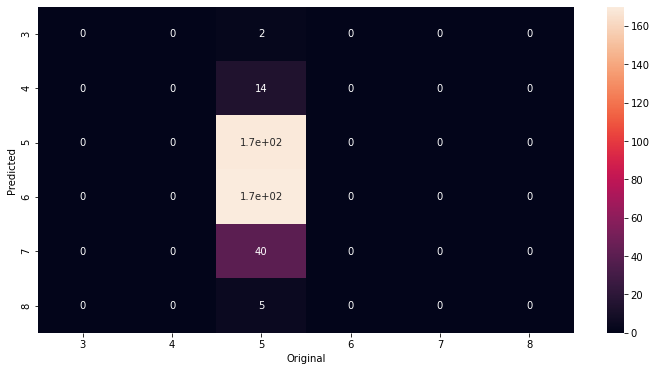

In [48]:

print("The Accuracy of the model is : ",accuracy_score(y_valid,convert_to_class_labels(y_pred_cat_1)))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,convert_to_class_labels(y_pred_cat_1)),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'categorical_accuracy'])


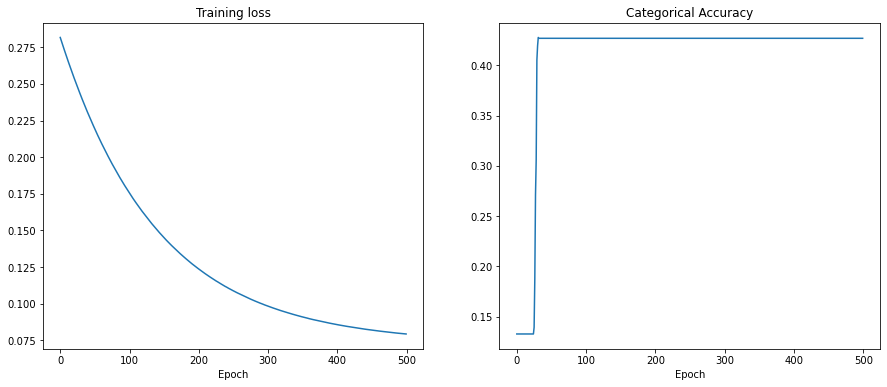

In [49]:
history=history_cat_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()


# Regressional Neural Network - Trial 1

In [50]:

###################################################################
#Regressional Neural Network
###################################################################
model_reg_1=k.Sequential()
model_reg_1.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_1.add(Flatten())
model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.2, input_shape=(50,)))
model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.2, input_shape=(50,)))
model_reg_1.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1.add(Dropout(0.5, input_shape=(50,)))
#model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.5, input_shape=(30,)))
model_reg_1.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_1.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_1=model_reg_1.fit(X_train1,y_train1,batch_size=100, epochs = 500) #add verbose later
print("Total Time Taken is : ",t-time.time())

Epoch 1/500
12/12 [==============================] - 0s 914us/step - loss: 15.0834 - mean_squared_error: 15.0213
Epoch 2/500
12/12 [==============================] - 0s 831us/step - loss: 0.8006 - mean_squared_error: 0.7129
Epoch 3/500
12/12 [==============================] - 0s 997us/step - loss: 0.7565 - mean_squared_error: 0.6710
Epoch 4/500
12/12 [==============================] - 0s 997us/step - loss: 0.7564 - mean_squared_error: 0.6714
Epoch 5/500
12/12 [==============================] - 0s 914us/step - loss: 0.7553 - mean_squared_error: 0.6711
Epoch 6/500
12/12 [==============================] - 0s 997us/step - loss: 0.7522 - mean_squared_error: 0.6690
Epoch 7/500
12/12 [==============================] - 0s 914us/step - loss: 0.7536 - mean_squared_error: 0.6712
Epoch 8/500
12/12 [==============================] - 0s 914us/step - loss: 0.7467 - mean_squared_error: 0.6649
Epoch 9/500
12/12 [==============================] - 0s 914us/step - loss: 0.7477 - mean_squared_error: 0.6670

12/12 [==============================] - 0s 914us/step - loss: 0.7069 - mean_squared_error: 0.6594
Epoch 74/500
12/12 [==============================] - 0s 914us/step - loss: 0.7079 - mean_squared_error: 0.6607
Epoch 75/500
12/12 [==============================] - 0s 997us/step - loss: 0.7052 - mean_squared_error: 0.6583
Epoch 76/500
12/12 [==============================] - 0s 997us/step - loss: 0.7050 - mean_squared_error: 0.6583
Epoch 77/500
12/12 [==============================] - 0s 997us/step - loss: 0.7036 - mean_squared_error: 0.6571
Epoch 78/500
12/12 [==============================] - 0s 997us/step - loss: 0.6978 - mean_squared_error: 0.6518
Epoch 79/500
12/12 [==============================] - 0s 914us/step - loss: 0.6988 - mean_squared_error: 0.6522
Epoch 80/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6942 - mean_squared_error: 0.6481
Epoch 81/500
12/12 [==============================] - 0s 997us/step - loss: 0.6944 - mean_squared_error: 0.6483
Epoch 8

12/12 [==============================] - 0s 997us/step - loss: 0.5097 - mean_squared_error: 0.4627
Epoch 146/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5001 - mean_squared_error: 0.4536
Epoch 147/500
12/12 [==============================] - 0s 997us/step - loss: 0.5083 - mean_squared_error: 0.4620
Epoch 148/500
12/12 [==============================] - 0s 914us/step - loss: 0.5031 - mean_squared_error: 0.4567
Epoch 149/500
12/12 [==============================] - 0s 997us/step - loss: 0.4968 - mean_squared_error: 0.4509
Epoch 150/500
12/12 [==============================] - 0s 997us/step - loss: 0.5014 - mean_squared_error: 0.4554
Epoch 151/500
12/12 [==============================] - 0s 997us/step - loss: 0.4980 - mean_squared_error: 0.4522
Epoch 152/500
12/12 [==============================] - 0s 914us/step - loss: 0.5169 - mean_squared_error: 0.4709
Epoch 153/500
12/12 [==============================] - 0s 997us/step - loss: 0.5169 - mean_squared_error: 0.4712

12/12 [==============================] - 0s 997us/step - loss: 0.4843 - mean_squared_error: 0.4431
Epoch 218/500
12/12 [==============================] - 0s 831us/step - loss: 0.4968 - mean_squared_error: 0.4559
Epoch 219/500
12/12 [==============================] - 0s 914us/step - loss: 0.4801 - mean_squared_error: 0.4391
Epoch 220/500
12/12 [==============================] - 0s 831us/step - loss: 0.4926 - mean_squared_error: 0.4517
Epoch 221/500
12/12 [==============================] - 0s 914us/step - loss: 0.4865 - mean_squared_error: 0.4456
Epoch 222/500
12/12 [==============================] - 0s 914us/step - loss: 0.4888 - mean_squared_error: 0.4480
Epoch 223/500
12/12 [==============================] - 0s 914us/step - loss: 0.4878 - mean_squared_error: 0.4469
Epoch 224/500
12/12 [==============================] - 0s 914us/step - loss: 0.4942 - mean_squared_error: 0.4532
Epoch 225/500
12/12 [==============================] - 0s 831us/step - loss: 0.4958 - mean_squared_error: 0.45

12/12 [==============================] - 0s 997us/step - loss: 0.4806 - mean_squared_error: 0.4427
Epoch 290/500
12/12 [==============================] - 0s 997us/step - loss: 0.4740 - mean_squared_error: 0.4357
Epoch 291/500
12/12 [==============================] - 0s 914us/step - loss: 0.4869 - mean_squared_error: 0.4489
Epoch 292/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4670 - mean_squared_error: 0.4289
Epoch 293/500
12/12 [==============================] - 0s 914us/step - loss: 0.4663 - mean_squared_error: 0.4279
Epoch 294/500
12/12 [==============================] - 0s 997us/step - loss: 0.4858 - mean_squared_error: 0.4478
Epoch 295/500
12/12 [==============================] - ETA: 0s - loss: 0.4284 - mean_squared_error: 0.38 - 0s 997us/step - loss: 0.4856 - mean_squared_error: 0.4474
Epoch 296/500
12/12 [==============================] - 0s 914us/step - loss: 0.4715 - mean_squared_error: 0.4337
Epoch 297/500
12/12 [==============================] - 0s 91

12/12 [==============================] - 0s 914us/step - loss: 0.4794 - mean_squared_error: 0.4425
Epoch 362/500
12/12 [==============================] - 0s 997us/step - loss: 0.4694 - mean_squared_error: 0.4325
Epoch 363/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4719 - mean_squared_error: 0.4351
Epoch 364/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4754 - mean_squared_error: 0.4390
Epoch 365/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4726 - mean_squared_error: 0.4359
Epoch 366/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4661 - mean_squared_error: 0.4295
Epoch 367/500
12/12 [==============================] - 0s 997us/step - loss: 0.4629 - mean_squared_error: 0.4259
Epoch 368/500
12/12 [==============================] - 0s 997us/step - loss: 0.4626 - mean_squared_error: 0.4257
Epoch 369/500
12/12 [==============================] - 0s 997us/step - loss: 0.4736 - mean_squared_error: 0.4369
Epoch

Epoch 433/500
12/12 [==============================] - 0s 997us/step - loss: 0.4675 - mean_squared_error: 0.4312
Epoch 434/500
12/12 [==============================] - 0s 997us/step - loss: 0.4713 - mean_squared_error: 0.4352
Epoch 435/500
12/12 [==============================] - 0s 914us/step - loss: 0.4710 - mean_squared_error: 0.4350
Epoch 436/500
12/12 [==============================] - 0s 914us/step - loss: 0.4850 - mean_squared_error: 0.4491
Epoch 437/500
12/12 [==============================] - 0s 997us/step - loss: 0.4689 - mean_squared_error: 0.4328
Epoch 438/500
12/12 [==============================] - 0s 997us/step - loss: 0.4592 - mean_squared_error: 0.4231
Epoch 439/500
12/12 [==============================] - 0s 914us/step - loss: 0.4681 - mean_squared_error: 0.4318
Epoch 440/500
12/12 [==============================] - 0s 831us/step - loss: 0.4704 - mean_squared_error: 0.4344
Epoch 441/500
12/12 [==============================] - 0s 997us/step - loss: 0.4792 - mean_squar

The Accuracy of the model is :  0.56


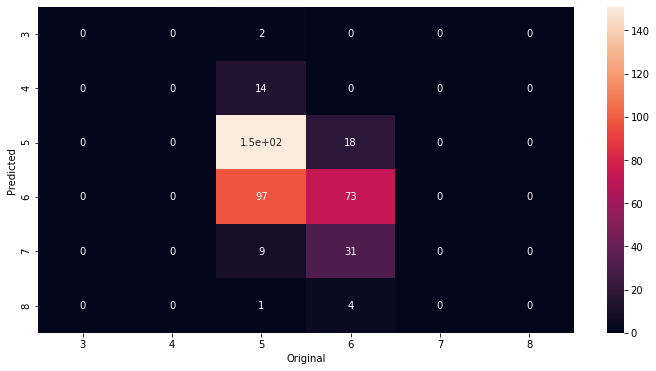

In [51]:
y_pred_reg_1=model_reg_1.predict(X_valid).astype("int64")
###########################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the model is : ",accuracy_score(y_valid,y_pred_reg_1))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,y_pred_reg_1),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error'])


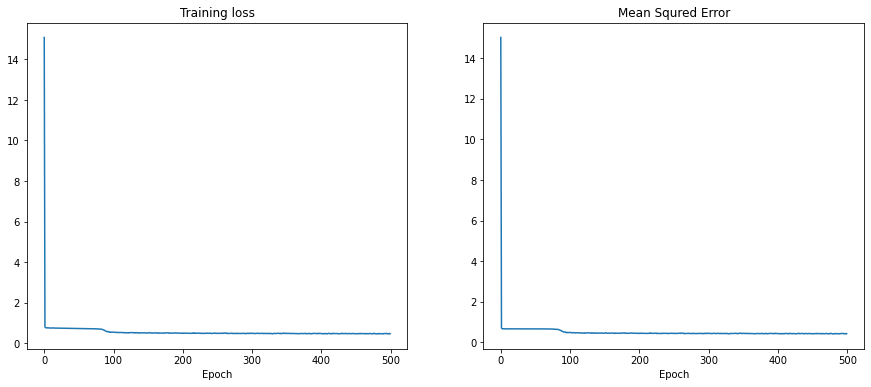

In [52]:
history=history_reg_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squred Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

**Some Experimentation** 

We will drop some columns that show some redundancy and check if the model improves, and if so how. We will also try to do some PCA on the parameters to make them good. 

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,test_size=0.30,random_state=0)

# Categorical Neural Network - Trial 2


In [54]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_2=k.Sequential()
#model_cat_2.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_2.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_2.add(BatchNormalization())
model_cat_2.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(60,)))
model_cat_2.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(30,)))
model_cat_2.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.4, input_shape=(60,)))
model_cat_2.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(60,)))
model_cat_2.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.4, input_shape=(60,)))
model_cat_2.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(30,)))
model_cat_2.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dropout(0.2, input_shape=(30,)))
model_cat_2.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_2.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_2.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_2=model_cat_2.fit(X_train,k.utils.to_categorical(y_train),validation_data = (X_valid,k.utils.to_categorical(y_valid)),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 36ms/step - loss: 0.4806 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4793 - val_categorical_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4786 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4773 - val_categorical_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4766 - categorical_accuracy: 0.0000e+00 - val_loss: 0.4752 - val_categorical_accuracy: 0.000

9/9 [==============================] - 0s 3ms/step - loss: 0.4008 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3998 - val_categorical_accuracy: 0.0000e+00
Epoch 45/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3992 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3981 - val_categorical_accuracy: 0.0000e+00
Epoch 46/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3975 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3964 - val_categorical_accuracy: 0.0000e+00
Epoch 47/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3958 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3948 - val_categorical_accuracy: 0.0000e+00
Epoch 48/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3942 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3932 - val_categorical_accuracy: 0.0000e+00
Epoch 49/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3926 - categorical_accuracy: 0.0000e+00 - val_loss: 0.3915 - val_categorical_ac

9/9 [==============================] - 0s 3ms/step - loss: 0.3292 - categorical_accuracy: 0.4327 - val_loss: 0.3283 - val_categorical_accuracy: 0.4225
Epoch 93/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3278 - categorical_accuracy: 0.4327 - val_loss: 0.3270 - val_categorical_accuracy: 0.4225
Epoch 94/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3265 - categorical_accuracy: 0.4327 - val_loss: 0.3257 - val_categorical_accuracy: 0.4225
Epoch 95/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3252 - categorical_accuracy: 0.4327 - val_loss: 0.3244 - val_categorical_accuracy: 0.4225
Epoch 96/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3239 - categorical_accuracy: 0.4327 - val_loss: 0.3231 - val_categorical_accuracy: 0.4225
Epoch 97/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3226 - categorical_accuracy: 0.4327 - val_loss: 0.3218 - val_categorical_accuracy: 0.4225
Epoch 98/500
9/9 [===========

Epoch 142/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2705 - categorical_accuracy: 0.4327 - val_loss: 0.2699 - val_categorical_accuracy: 0.4225
Epoch 143/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2695 - categorical_accuracy: 0.4327 - val_loss: 0.2689 - val_categorical_accuracy: 0.4225
Epoch 144/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2684 - categorical_accuracy: 0.4327 - val_loss: 0.2679 - val_categorical_accuracy: 0.4225
Epoch 145/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2674 - categorical_accuracy: 0.4327 - val_loss: 0.2668 - val_categorical_accuracy: 0.4225
Epoch 146/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2664 - categorical_accuracy: 0.4327 - val_loss: 0.2658 - val_categorical_accuracy: 0.4225
Epoch 147/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2655 - categorical_accuracy: 0.4327 - val_loss: 0.2648 - val_categorical_accuracy: 0.4225
Epoch 148/

Epoch 192/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2255 - categorical_accuracy: 0.4327 - val_loss: 0.2250 - val_categorical_accuracy: 0.4225
Epoch 193/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2247 - categorical_accuracy: 0.4327 - val_loss: 0.2242 - val_categorical_accuracy: 0.4225
Epoch 194/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2239 - categorical_accuracy: 0.4327 - val_loss: 0.2235 - val_categorical_accuracy: 0.4225
Epoch 195/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2232 - categorical_accuracy: 0.4327 - val_loss: 0.2227 - val_categorical_accuracy: 0.4225
Epoch 196/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2223 - categorical_accuracy: 0.4327 - val_loss: 0.2219 - val_categorical_accuracy: 0.4225
Epoch 197/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2216 - categorical_accuracy: 0.4327 - val_loss: 0.2212 - val_categorical_accuracy: 0.4225
Epoch 198/

Epoch 242/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1911 - categorical_accuracy: 0.4327 - val_loss: 0.1906 - val_categorical_accuracy: 0.4225
Epoch 243/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1905 - categorical_accuracy: 0.4327 - val_loss: 0.1900 - val_categorical_accuracy: 0.4225
Epoch 244/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1898 - categorical_accuracy: 0.4327 - val_loss: 0.1894 - val_categorical_accuracy: 0.4225
Epoch 245/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1892 - categorical_accuracy: 0.4327 - val_loss: 0.1888 - val_categorical_accuracy: 0.4225
Epoch 246/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1886 - categorical_accuracy: 0.4327 - val_loss: 0.1882 - val_categorical_accuracy: 0.4225
Epoch 247/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1881 - categorical_accuracy: 0.4327 - val_loss: 0.1876 - val_categorical_accuracy: 0.4225
Epoch 248/

Epoch 292/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1644 - categorical_accuracy: 0.4327 - val_loss: 0.1638 - val_categorical_accuracy: 0.4225
Epoch 293/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1639 - categorical_accuracy: 0.4327 - val_loss: 0.1633 - val_categorical_accuracy: 0.4225
Epoch 294/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1634 - categorical_accuracy: 0.4327 - val_loss: 0.1628 - val_categorical_accuracy: 0.4225
Epoch 295/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1629 - categorical_accuracy: 0.4327 - val_loss: 0.1624 - val_categorical_accuracy: 0.4225
Epoch 296/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1625 - categorical_accuracy: 0.4327 - val_loss: 0.1619 - val_categorical_accuracy: 0.4225
Epoch 297/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1620 - categorical_accuracy: 0.4327 - val_loss: 0.1615 - val_categorical_accuracy: 0.4225
Epoch 298/

9/9 [==============================] - 0s 3ms/step - loss: 0.1439 - categorical_accuracy: 0.4327 - val_loss: 0.1431 - val_categorical_accuracy: 0.4225
Epoch 342/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1435 - categorical_accuracy: 0.4327 - val_loss: 0.1427 - val_categorical_accuracy: 0.4225
Epoch 343/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1431 - categorical_accuracy: 0.4327 - val_loss: 0.1424 - val_categorical_accuracy: 0.4225
Epoch 344/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1428 - categorical_accuracy: 0.4327 - val_loss: 0.1420 - val_categorical_accuracy: 0.4225
Epoch 345/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1424 - categorical_accuracy: 0.4327 - val_loss: 0.1416 - val_categorical_accuracy: 0.4225
Epoch 346/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1421 - categorical_accuracy: 0.4327 - val_loss: 0.1413 - val_categorical_accuracy: 0.4225
Epoch 347/500
9/9 [=====

Epoch 391/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1276 - categorical_accuracy: 0.4327 - val_loss: 0.1266 - val_categorical_accuracy: 0.4225
Epoch 392/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1273 - categorical_accuracy: 0.4327 - val_loss: 0.1263 - val_categorical_accuracy: 0.4225
Epoch 393/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1271 - categorical_accuracy: 0.4327 - val_loss: 0.1260 - val_categorical_accuracy: 0.4225
Epoch 394/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1268 - categorical_accuracy: 0.4327 - val_loss: 0.1257 - val_categorical_accuracy: 0.4225
Epoch 395/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1265 - categorical_accuracy: 0.4327 - val_loss: 0.1255 - val_categorical_accuracy: 0.4225
Epoch 396/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1262 - categorical_accuracy: 0.4327 - val_loss: 0.1252 - val_categorical_accuracy: 0.4225
Epoch 397/

Epoch 441/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1151 - categorical_accuracy: 0.4327 - val_loss: 0.1139 - val_categorical_accuracy: 0.4225
Epoch 442/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1149 - categorical_accuracy: 0.4327 - val_loss: 0.1136 - val_categorical_accuracy: 0.4225
Epoch 443/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1147 - categorical_accuracy: 0.4327 - val_loss: 0.1134 - val_categorical_accuracy: 0.4225
Epoch 444/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1144 - categorical_accuracy: 0.4327 - val_loss: 0.1132 - val_categorical_accuracy: 0.4225
Epoch 445/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1143 - categorical_accuracy: 0.4327 - val_loss: 0.1130 - val_categorical_accuracy: 0.4225
Epoch 446/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1140 - categorical_accuracy: 0.4327 - val_loss: 0.1128 - val_categorical_accuracy: 0.4225
Epoch 447/

Epoch 491/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1055 - categorical_accuracy: 0.4327 - val_loss: 0.1041 - val_categorical_accuracy: 0.4225
Epoch 492/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1053 - categorical_accuracy: 0.4327 - val_loss: 0.1039 - val_categorical_accuracy: 0.4225
Epoch 493/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1052 - categorical_accuracy: 0.4327 - val_loss: 0.1038 - val_categorical_accuracy: 0.4225
Epoch 494/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1050 - categorical_accuracy: 0.4327 - val_loss: 0.1036 - val_categorical_accuracy: 0.4225
Epoch 495/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1049 - categorical_accuracy: 0.4327 - val_loss: 0.1034 - val_categorical_accuracy: 0.4225
Epoch 496/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1047 - categorical_accuracy: 0.4327 - val_loss: 0.1033 - val_categorical_accuracy: 0.4225
Epoch 497/

The Accuracy of the model is :  0.41388888888888886


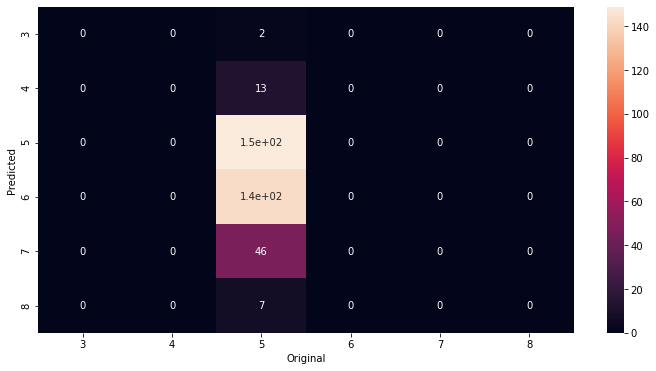

In [55]:
y_pred_cat_2=model_cat_2.predict(X_test)

print("The Accuracy of the model is : ",accuracy_score(y_test,convert_to_class_labels(y_pred_cat_2)))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,convert_to_class_labels(y_pred_cat_2)),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


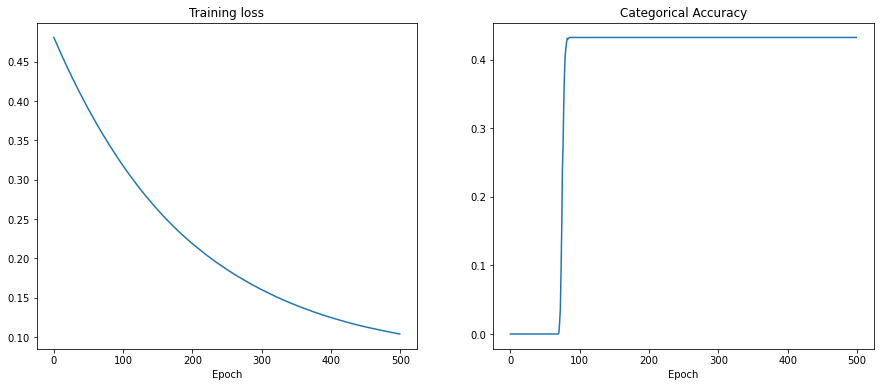

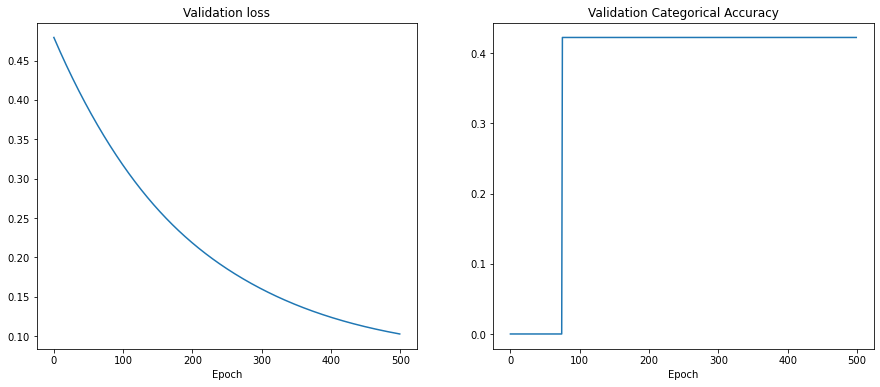

In [56]:
history=history_cat_2.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_categorical_accuracy"])
ax.set_title("Validation Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

# Regression Neural Network - Trial 2


In [57]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_2=k.Sequential()
model_reg_2.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_2.add(Flatten())
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.2, input_shape=(50,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.2, input_shape=(50,)))
model_reg_2.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.5, input_shape=(50,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.2, input_shape=(50,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dropout(0.5, input_shape=(30,)))
model_reg_2.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_2.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_2.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_2=model_reg_2.fit(X_train,y_train,validation_data = (X_valid.to_numpy(),y_valid),batch_size=100, epochs = 500) #add verbose later
print("Total Time Taken is : ",t-time.time())


Epoch 1/500
9/9 [==============================] - 0s 24ms/step - loss: 19.9211 - mean_squared_error: 19.8235 - val_loss: 2.2126 - val_mean_squared_error: 2.0943
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 1.0250 - mean_squared_error: 0.8971 - val_loss: 0.7508 - val_mean_squared_error: 0.6219
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7801 - mean_squared_error: 0.6525 - val_loss: 0.7382 - val_mean_squared_error: 0.6112
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7770 - mean_squared_error: 0.6503 - val_loss: 0.7375 - val_mean_squared_error: 0.6117
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7744 - mean_squared_error: 0.6491 - val_loss: 0.7380 - val_mean_squared_error: 0.6127
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7768 - mean_squared_error: 0.6519 - val_loss: 0.7352 - val_mean_squared_error: 0.6112
Epoch 7/500
9/9 [==========================

9/9 [==============================] - 0s 2ms/step - loss: 0.7381 - mean_squared_error: 0.6503 - val_loss: 0.6992 - val_mean_squared_error: 0.6116
Epoch 53/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7386 - mean_squared_error: 0.6513 - val_loss: 0.6982 - val_mean_squared_error: 0.6113
Epoch 54/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7366 - mean_squared_error: 0.6501 - val_loss: 0.7001 - val_mean_squared_error: 0.6135
Epoch 55/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7399 - mean_squared_error: 0.6537 - val_loss: 0.6969 - val_mean_squared_error: 0.6113
Epoch 56/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7362 - mean_squared_error: 0.6509 - val_loss: 0.6977 - val_mean_squared_error: 0.6125
Epoch 57/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7368 - mean_squared_error: 0.6520 - val_loss: 0.6980 - val_mean_squared_error: 0.6133
Epoch 58/500
9/9 [==============================] - 0

9/9 [==============================] - 0s 2ms/step - loss: 0.7170 - mean_squared_error: 0.6554 - val_loss: 0.6720 - val_mean_squared_error: 0.6112
Epoch 104/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7115 - mean_squared_error: 0.6508 - val_loss: 0.6717 - val_mean_squared_error: 0.6112
Epoch 105/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7101 - mean_squared_error: 0.6498 - val_loss: 0.6746 - val_mean_squared_error: 0.6141
Epoch 106/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7118 - mean_squared_error: 0.6515 - val_loss: 0.6711 - val_mean_squared_error: 0.6116
Epoch 107/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7107 - mean_squared_error: 0.6513 - val_loss: 0.6718 - val_mean_squared_error: 0.6123
Epoch 108/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7101 - mean_squared_error: 0.6510 - val_loss: 0.6717 - val_mean_squared_error: 0.6125
Epoch 109/500
9/9 [=============================

Epoch 154/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6968 - mean_squared_error: 0.6529 - val_loss: 0.6565 - val_mean_squared_error: 0.6133
Epoch 155/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6960 - mean_squared_error: 0.6529 - val_loss: 0.6587 - val_mean_squared_error: 0.6149
Epoch 156/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6957 - mean_squared_error: 0.6520 - val_loss: 0.6543 - val_mean_squared_error: 0.6113
Epoch 157/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6941 - mean_squared_error: 0.6513 - val_loss: 0.6578 - val_mean_squared_error: 0.6146
Epoch 158/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6973 - mean_squared_error: 0.6542 - val_loss: 0.6542 - val_mean_squared_error: 0.6115
Epoch 159/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6940 - mean_squared_error: 0.6514 - val_loss: 0.6548 - val_mean_squared_error: 0.6122
Epoch 160/500
9/9 [===============

Epoch 205/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6845 - mean_squared_error: 0.6520 - val_loss: 0.6436 - val_mean_squared_error: 0.6112
Epoch 206/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6820 - mean_squared_error: 0.6499 - val_loss: 0.6452 - val_mean_squared_error: 0.6127
Epoch 207/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6839 - mean_squared_error: 0.6516 - val_loss: 0.6432 - val_mean_squared_error: 0.6113
Epoch 208/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6832 - mean_squared_error: 0.6513 - val_loss: 0.6453 - val_mean_squared_error: 0.6132
Epoch 209/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6856 - mean_squared_error: 0.6537 - val_loss: 0.6450 - val_mean_squared_error: 0.6130
Epoch 210/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6825 - mean_squared_error: 0.6507 - val_loss: 0.6433 - val_mean_squared_error: 0.6121
Epoch 211/500
9/9 [===============

Epoch 256/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6768 - mean_squared_error: 0.6519 - val_loss: 0.6407 - val_mean_squared_error: 0.6154
Epoch 257/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6766 - mean_squared_error: 0.6515 - val_loss: 0.6359 - val_mean_squared_error: 0.6112
Epoch 258/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6750 - mean_squared_error: 0.6503 - val_loss: 0.6374 - val_mean_squared_error: 0.6126
Epoch 259/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6761 - mean_squared_error: 0.6514 - val_loss: 0.6362 - val_mean_squared_error: 0.6116
Epoch 260/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6744 - mean_squared_error: 0.6500 - val_loss: 0.6375 - val_mean_squared_error: 0.6129
Epoch 261/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6786 - mean_squared_error: 0.6541 - val_loss: 0.6354 - val_mean_squared_error: 0.6113
Epoch 262/500
9/9 [===============

Epoch 307/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6739 - mean_squared_error: 0.6541 - val_loss: 0.6309 - val_mean_squared_error: 0.6112
Epoch 308/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6713 - mean_squared_error: 0.6517 - val_loss: 0.6352 - val_mean_squared_error: 0.6151
Epoch 309/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6718 - mean_squared_error: 0.6519 - val_loss: 0.6310 - val_mean_squared_error: 0.6113
Epoch 310/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6719 - mean_squared_error: 0.6521 - val_loss: 0.6322 - val_mean_squared_error: 0.6130
Epoch 311/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6702 - mean_squared_error: 0.6509 - val_loss: 0.6360 - val_mean_squared_error: 0.6161
Epoch 312/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6736 - mean_squared_error: 0.6542 - val_loss: 0.6326 - val_mean_squared_error: 0.6130
Epoch 313/500
9/9 [===============

Epoch 358/500
9/9 [==============================] - ETA: 0s - loss: 0.7380 - mean_squared_error: 0.72 - 0s 2ms/step - loss: 0.6678 - mean_squared_error: 0.6515 - val_loss: 0.6275 - val_mean_squared_error: 0.6113
Epoch 359/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6699 - mean_squared_error: 0.6538 - val_loss: 0.6317 - val_mean_squared_error: 0.6151
Epoch 360/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6687 - mean_squared_error: 0.6523 - val_loss: 0.6276 - val_mean_squared_error: 0.6116
Epoch 361/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6673 - mean_squared_error: 0.6511 - val_loss: 0.6272 - val_mean_squared_error: 0.6112
Epoch 362/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6666 - mean_squared_error: 0.6506 - val_loss: 0.6295 - val_mean_squared_error: 0.6133
Epoch 363/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6678 - mean_squared_error: 0.6516 - val_loss: 0.6273 - val_mean_squa

9/9 [==============================] - 0s 3ms/step - loss: 0.6649 - mean_squared_error: 0.6510 - val_loss: 0.6264 - val_mean_squared_error: 0.6128
Epoch 409/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6668 - mean_squared_error: 0.6531 - val_loss: 0.6261 - val_mean_squared_error: 0.6126
Epoch 410/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6661 - mean_squared_error: 0.6525 - val_loss: 0.6254 - val_mean_squared_error: 0.6116
Epoch 411/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6642 - mean_squared_error: 0.6504 - val_loss: 0.6266 - val_mean_squared_error: 0.6127
Epoch 412/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6648 - mean_squared_error: 0.6510 - val_loss: 0.6249 - val_mean_squared_error: 0.6113
Epoch 413/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6655 - mean_squared_error: 0.6520 - val_loss: 0.6299 - val_mean_squared_error: 0.6159
Epoch 414/500
9/9 [=============================

Epoch 459/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6632 - mean_squared_error: 0.6510 - val_loss: 0.6231 - val_mean_squared_error: 0.6112
Epoch 460/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6625 - mean_squared_error: 0.6507 - val_loss: 0.6269 - val_mean_squared_error: 0.6147
Epoch 461/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6644 - mean_squared_error: 0.6524 - val_loss: 0.6275 - val_mean_squared_error: 0.6153
Epoch 462/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6657 - mean_squared_error: 0.6535 - val_loss: 0.6235 - val_mean_squared_error: 0.6115
Epoch 463/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6636 - mean_squared_error: 0.6516 - val_loss: 0.6236 - val_mean_squared_error: 0.6117
Epoch 464/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6622 - mean_squared_error: 0.6504 - val_loss: 0.6240 - val_mean_squared_error: 0.6121
Epoch 465/500
9/9 [===============

The Accuracy of the model is :  0.41388888888888886


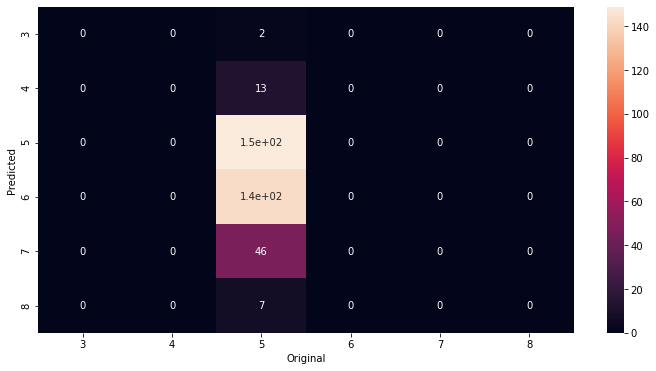

In [58]:
y_pred_reg_2=model_reg_2.predict(X_test).astype("int64")
print("The Accuracy of the model is : ",accuracy_score(y_test,y_pred_reg_2))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_reg_2),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


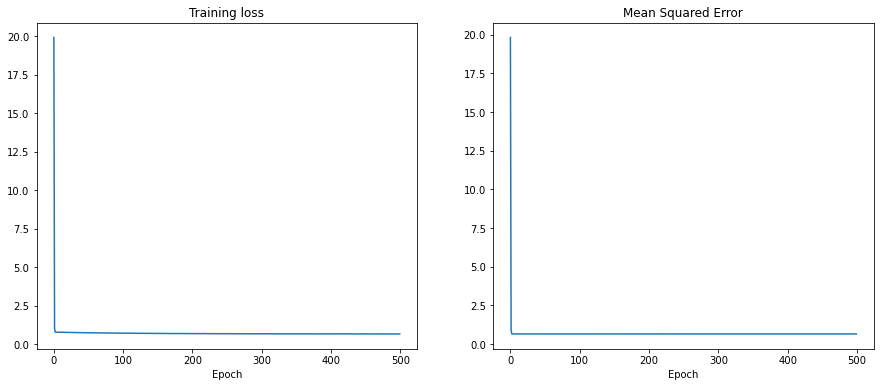

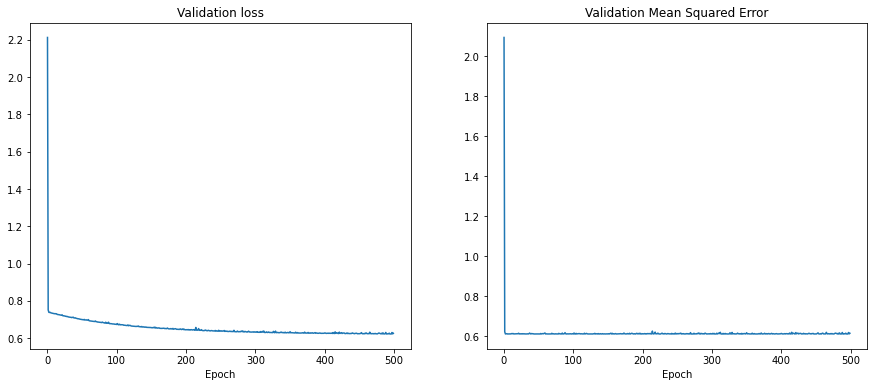

In [59]:
history=history_reg_2.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_mean_squared_error"])
ax.set_title("Validation Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

Looks like some serious overfitting going on with Categorical Neural Network.

**Some Principal Component Analysis**
Let us do some principal component analysis to eliminate some unknown or redundant dimensions in the data, and redo the whole thing again.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = StandardScaler().fit_transform(data)
pca = PCA(n_components=6)
data_in = pca.fit_transform(data)
data = pd.DataFrame(data = data_in)

In [61]:
X_train1, X_valid, y_train1, y_valid = train_test_split(data, data_org["Signal_Strength"], random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,test_size=0.30,random_state=0)

# Categorical Neural Network - Trial 3

In [62]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_3=k.Sequential()
#model_cat_3.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_3.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_3.add(BatchNormalization())
model_cat_3.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(60,)))
model_cat_3.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(30,)))
model_cat_3.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.4, input_shape=(60,)))
model_cat_3.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(60,)))
model_cat_3.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.4, input_shape=(60,)))
model_cat_3.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(30,)))
model_cat_3.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dropout(0.2, input_shape=(30,)))
model_cat_3.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_3.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_3.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_3=model_cat_3.fit(X_train,k.utils.to_categorical(y_train),validation_data = (X_valid,k.utils.to_categorical(y_valid)),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 1s 66ms/step - loss: 0.4664 - categorical_accuracy: 0.0072 - val_loss: 0.4658 - val_categorical_accuracy: 0.0125
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4645 - categorical_accuracy: 0.0072 - val_loss: 0.4638 - val_categorical_accuracy: 0.0125
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4626 - categorical_accuracy: 0.0072 - val_loss: 0.4619 - val_categorical_accuracy: 0.0125
Epoch 4/500
9/9 [=

9/9 [==============================] - 0s 2ms/step - loss: 0.3889 - categorical_accuracy: 0.0072 - val_loss: 0.3884 - val_categorical_accuracy: 0.0125
Epoch 47/500
9/9 [==============================] - 0s 2ms/step - loss: 0.3874 - categorical_accuracy: 0.0060 - val_loss: 0.3869 - val_categorical_accuracy: 0.0125
Epoch 48/500
9/9 [==============================] - 0s 2ms/step - loss: 0.3859 - categorical_accuracy: 0.0107 - val_loss: 0.3853 - val_categorical_accuracy: 0.0125
Epoch 49/500
9/9 [==============================] - 0s 2ms/step - loss: 0.3843 - categorical_accuracy: 0.0167 - val_loss: 0.3838 - val_categorical_accuracy: 0.0125
Epoch 50/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3828 - categorical_accuracy: 0.0155 - val_loss: 0.3823 - val_categorical_accuracy: 0.0125
Epoch 51/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3813 - categorical_accuracy: 0.0107 - val_loss: 0.3808 - val_categorical_accuracy: 0.0125
Epoch 52/500
9/9 [===========

9/9 [==============================] - 0s 3ms/step - loss: 0.3205 - categorical_accuracy: 0.1347 - val_loss: 0.3199 - val_categorical_accuracy: 0.1000
Epoch 97/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3193 - categorical_accuracy: 0.1347 - val_loss: 0.3187 - val_categorical_accuracy: 0.1000
Epoch 98/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3181 - categorical_accuracy: 0.1347 - val_loss: 0.3175 - val_categorical_accuracy: 0.1000
Epoch 99/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3169 - categorical_accuracy: 0.1347 - val_loss: 0.3163 - val_categorical_accuracy: 0.1000
Epoch 100/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3157 - categorical_accuracy: 0.1347 - val_loss: 0.3151 - val_categorical_accuracy: 0.1000
Epoch 101/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3145 - categorical_accuracy: 0.1347 - val_loss: 0.3139 - val_categorical_accuracy: 0.1000
Epoch 102/500
9/9 [========

Epoch 146/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2664 - categorical_accuracy: 0.3874 - val_loss: 0.2656 - val_categorical_accuracy: 0.4250
Epoch 147/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2655 - categorical_accuracy: 0.3874 - val_loss: 0.2646 - val_categorical_accuracy: 0.4250
Epoch 148/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2645 - categorical_accuracy: 0.3874 - val_loss: 0.2637 - val_categorical_accuracy: 0.4250
Epoch 149/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2636 - categorical_accuracy: 0.3874 - val_loss: 0.2627 - val_categorical_accuracy: 0.4250
Epoch 150/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2627 - categorical_accuracy: 0.3874 - val_loss: 0.2618 - val_categorical_accuracy: 0.4250
Epoch 151/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2617 - categorical_accuracy: 0.3874 - val_loss: 0.2608 - val_categorical_accuracy: 0.4250
Epoch 152/

Epoch 196/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2240 - categorical_accuracy: 0.3874 - val_loss: 0.2228 - val_categorical_accuracy: 0.4250
Epoch 197/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2232 - categorical_accuracy: 0.3874 - val_loss: 0.2221 - val_categorical_accuracy: 0.4250
Epoch 198/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2225 - categorical_accuracy: 0.3874 - val_loss: 0.2213 - val_categorical_accuracy: 0.4250
Epoch 199/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2218 - categorical_accuracy: 0.3874 - val_loss: 0.2206 - val_categorical_accuracy: 0.4250
Epoch 200/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2210 - categorical_accuracy: 0.3874 - val_loss: 0.2198 - val_categorical_accuracy: 0.4250
Epoch 201/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2203 - categorical_accuracy: 0.3874 - val_loss: 0.2191 - val_categorical_accuracy: 0.4250
Epoch 202/

9/9 [==============================] - 0s 3ms/step - loss: 0.1916 - categorical_accuracy: 0.3874 - val_loss: 0.1901 - val_categorical_accuracy: 0.4250
Epoch 246/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1911 - categorical_accuracy: 0.3874 - val_loss: 0.1895 - val_categorical_accuracy: 0.4250
Epoch 247/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1905 - categorical_accuracy: 0.3874 - val_loss: 0.1889 - val_categorical_accuracy: 0.4250
Epoch 248/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1899 - categorical_accuracy: 0.3874 - val_loss: 0.1884 - val_categorical_accuracy: 0.4250
Epoch 249/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1893 - categorical_accuracy: 0.3874 - val_loss: 0.1878 - val_categorical_accuracy: 0.4250
Epoch 250/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1888 - categorical_accuracy: 0.3874 - val_loss: 0.1872 - val_categorical_accuracy: 0.4250
Epoch 251/500
9/9 [=====

Epoch 295/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1659 - categorical_accuracy: 0.3874 - val_loss: 0.1642 - val_categorical_accuracy: 0.4250
Epoch 296/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1655 - categorical_accuracy: 0.3874 - val_loss: 0.1637 - val_categorical_accuracy: 0.4250
Epoch 297/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1650 - categorical_accuracy: 0.3874 - val_loss: 0.1633 - val_categorical_accuracy: 0.4250
Epoch 298/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1645 - categorical_accuracy: 0.3874 - val_loss: 0.1628 - val_categorical_accuracy: 0.4250
Epoch 299/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1641 - categorical_accuracy: 0.3874 - val_loss: 0.1624 - val_categorical_accuracy: 0.4250
Epoch 300/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1637 - categorical_accuracy: 0.3874 - val_loss: 0.1619 - val_categorical_accuracy: 0.4250
Epoch 301/

Epoch 345/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1456 - categorical_accuracy: 0.3874 - val_loss: 0.1438 - val_categorical_accuracy: 0.4250
Epoch 346/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1452 - categorical_accuracy: 0.3874 - val_loss: 0.1434 - val_categorical_accuracy: 0.4250
Epoch 347/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1448 - categorical_accuracy: 0.3874 - val_loss: 0.1431 - val_categorical_accuracy: 0.4250
Epoch 348/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1445 - categorical_accuracy: 0.3874 - val_loss: 0.1427 - val_categorical_accuracy: 0.4250
Epoch 349/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1442 - categorical_accuracy: 0.3874 - val_loss: 0.1423 - val_categorical_accuracy: 0.4250
Epoch 350/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1438 - categorical_accuracy: 0.3874 - val_loss: 0.1420 - val_categorical_accuracy: 0.4250
Epoch 351/

Epoch 395/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1292 - categorical_accuracy: 0.3874 - val_loss: 0.1274 - val_categorical_accuracy: 0.4250
Epoch 396/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1289 - categorical_accuracy: 0.3874 - val_loss: 0.1271 - val_categorical_accuracy: 0.4250
Epoch 397/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1286 - categorical_accuracy: 0.3874 - val_loss: 0.1268 - val_categorical_accuracy: 0.4250
Epoch 398/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1283 - categorical_accuracy: 0.3874 - val_loss: 0.1266 - val_categorical_accuracy: 0.4250
Epoch 399/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1280 - categorical_accuracy: 0.3874 - val_loss: 0.1263 - val_categorical_accuracy: 0.4250
Epoch 400/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1277 - categorical_accuracy: 0.3874 - val_loss: 0.1260 - val_categorical_accuracy: 0.4250
Epoch 401/

Epoch 445/500
9/9 [==============================] - 0s 2ms/step - loss: 0.1159 - categorical_accuracy: 0.3874 - val_loss: 0.1143 - val_categorical_accuracy: 0.4250
Epoch 446/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1157 - categorical_accuracy: 0.3874 - val_loss: 0.1141 - val_categorical_accuracy: 0.4250
Epoch 447/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1154 - categorical_accuracy: 0.3874 - val_loss: 0.1139 - val_categorical_accuracy: 0.4250
Epoch 448/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1152 - categorical_accuracy: 0.3874 - val_loss: 0.1136 - val_categorical_accuracy: 0.4250
Epoch 449/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1150 - categorical_accuracy: 0.3874 - val_loss: 0.1134 - val_categorical_accuracy: 0.4250
Epoch 450/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1147 - categorical_accuracy: 0.3874 - val_loss: 0.1132 - val_categorical_accuracy: 0.4250
Epoch 451/

Epoch 495/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1056 - categorical_accuracy: 0.3874 - val_loss: 0.1041 - val_categorical_accuracy: 0.4250
Epoch 496/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1054 - categorical_accuracy: 0.3874 - val_loss: 0.1039 - val_categorical_accuracy: 0.4250
Epoch 497/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1052 - categorical_accuracy: 0.3874 - val_loss: 0.1038 - val_categorical_accuracy: 0.4250
Epoch 498/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1050 - categorical_accuracy: 0.3874 - val_loss: 0.1036 - val_categorical_accuracy: 0.4250
Epoch 499/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1049 - categorical_accuracy: 0.3874 - val_loss: 0.1034 - val_categorical_accuracy: 0.4250
Epoch 500/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1047 - categorical_accuracy: 0.3874 - val_loss: 0.1032 - val_categorical_accuracy: 0.4250
Total Time

The Accuracy of the model is :  0.3972222222222222


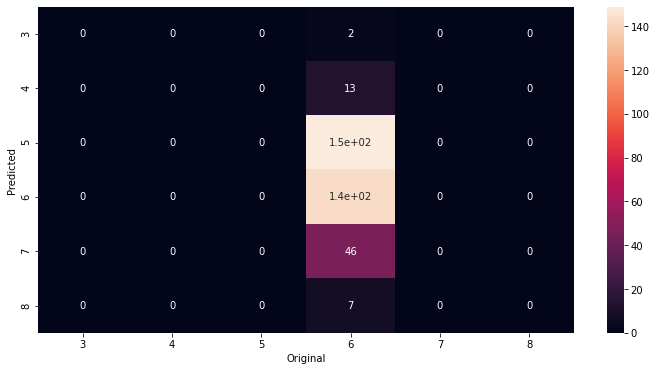

In [63]:
y_pred_cat_3=model_cat_3.predict(X_test)
print("The Accuracy of the model is : ",accuracy_score(y_test,convert_to_class_labels(y_pred_cat_3)))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,convert_to_class_labels(y_pred_cat_3)),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


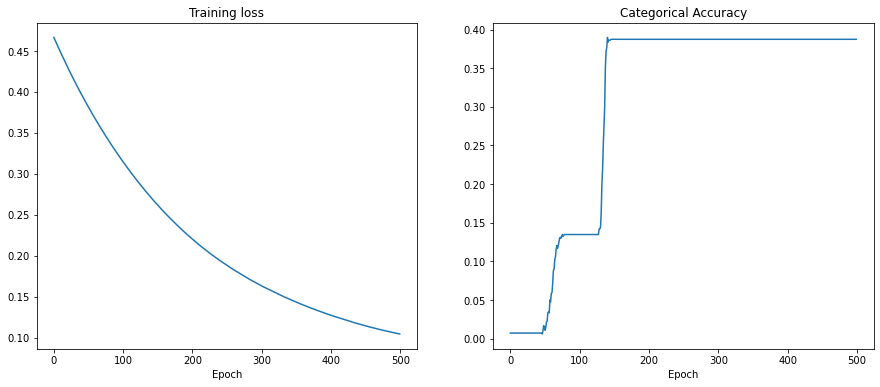

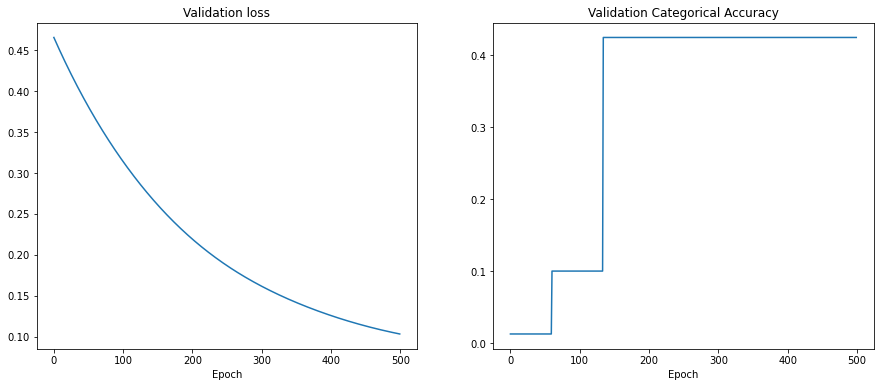

In [64]:
history=history_cat_3.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_categorical_accuracy"])
ax.set_title("Validation Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

# Regression Neural Network - Trial 3

In [65]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_3=k.Sequential()
model_reg_3.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_3.add(Flatten())
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.2, input_shape=(50,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.2, input_shape=(50,)))
model_reg_3.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.5, input_shape=(50,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.2, input_shape=(50,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dropout(0.5, input_shape=(30,)))
model_reg_3.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_3.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_3.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_3=model_reg_3.fit(X_train,y_train,validation_data = (X_valid.to_numpy(),y_valid),batch_size=100, epochs = 500) #add verbose later
print("Total Time Taken is : ",t-time.time())


Epoch 1/500
9/9 [==============================] - 0s 28ms/step - loss: 19.2670 - mean_squared_error: 19.1709 - val_loss: 1.6159 - val_mean_squared_error: 1.4973
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9656 - mean_squared_error: 0.8386 - val_loss: 0.7380 - val_mean_squared_error: 0.6117
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7800 - mean_squared_error: 0.6544 - val_loss: 0.7377 - val_mean_squared_error: 0.6124
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7779 - mean_squared_error: 0.6532 - val_loss: 0.7360 - val_mean_squared_error: 0.6117
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7758 - mean_squared_error: 0.6519 - val_loss: 0.7345 - val_mean_squared_error: 0.6112
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7803 - mean_squared_error: 0.6574 - val_loss: 0.7338 - val_mean_squared_error: 0.6114
Epoch 7/500
9/9 [==========================

9/9 [==============================] - 0s 3ms/step - loss: 0.7387 - mean_squared_error: 0.6504 - val_loss: 0.6989 - val_mean_squared_error: 0.6113
Epoch 51/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7389 - mean_squared_error: 0.6515 - val_loss: 0.6983 - val_mean_squared_error: 0.6112
Epoch 52/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7400 - mean_squared_error: 0.6532 - val_loss: 0.6983 - val_mean_squared_error: 0.6117
Epoch 53/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7366 - mean_squared_error: 0.6504 - val_loss: 0.6972 - val_mean_squared_error: 0.6113
Epoch 54/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7375 - mean_squared_error: 0.6519 - val_loss: 0.6965 - val_mean_squared_error: 0.6112
Epoch 55/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7349 - mean_squared_error: 0.6499 - val_loss: 0.6958 - val_mean_squared_error: 0.6112
Epoch 56/500
9/9 [==============================] - 0

9/9 [==============================] - 0s 2ms/step - loss: 0.7121 - mean_squared_error: 0.6506 - val_loss: 0.6724 - val_mean_squared_error: 0.6112
Epoch 102/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7115 - mean_squared_error: 0.6504 - val_loss: 0.6720 - val_mean_squared_error: 0.6112
Epoch 103/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7117 - mean_squared_error: 0.6510 - val_loss: 0.6716 - val_mean_squared_error: 0.6112
Epoch 104/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7109 - mean_squared_error: 0.6506 - val_loss: 0.6712 - val_mean_squared_error: 0.6112
Epoch 105/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7102 - mean_squared_error: 0.6505 - val_loss: 0.6728 - val_mean_squared_error: 0.6129
Epoch 106/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7112 - mean_squared_error: 0.6514 - val_loss: 0.6707 - val_mean_squared_error: 0.6117
Epoch 107/500
9/9 [=============================

Epoch 152/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6949 - mean_squared_error: 0.6505 - val_loss: 0.6553 - val_mean_squared_error: 0.6113
Epoch 153/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6952 - mean_squared_error: 0.6510 - val_loss: 0.6560 - val_mean_squared_error: 0.6125
Epoch 154/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6970 - mean_squared_error: 0.6534 - val_loss: 0.6554 - val_mean_squared_error: 0.6117
Epoch 155/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6946 - mean_squared_error: 0.6511 - val_loss: 0.6576 - val_mean_squared_error: 0.6140
Epoch 156/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6950 - mean_squared_error: 0.6515 - val_loss: 0.6544 - val_mean_squared_error: 0.6116
Epoch 157/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6943 - mean_squared_error: 0.6516 - val_loss: 0.6572 - val_mean_squared_error: 0.6141
Epoch 158/500
9/9 [===============

Epoch 203/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6851 - mean_squared_error: 0.6521 - val_loss: 0.6444 - val_mean_squared_error: 0.6119
Epoch 204/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6845 - mean_squared_error: 0.6517 - val_loss: 0.6438 - val_mean_squared_error: 0.6113
Epoch 205/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6823 - mean_squared_error: 0.6499 - val_loss: 0.6438 - val_mean_squared_error: 0.6113
Epoch 206/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6830 - mean_squared_error: 0.6506 - val_loss: 0.6455 - val_mean_squared_error: 0.6130
Epoch 207/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6851 - mean_squared_error: 0.6529 - val_loss: 0.6462 - val_mean_squared_error: 0.6138
Epoch 208/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6860 - mean_squared_error: 0.6538 - val_loss: 0.6437 - val_mean_squared_error: 0.6117
Epoch 209/500
9/9 [===============

Epoch 254/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6754 - mean_squared_error: 0.6499 - val_loss: 0.6364 - val_mean_squared_error: 0.6112
Epoch 255/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6769 - mean_squared_error: 0.6517 - val_loss: 0.6364 - val_mean_squared_error: 0.6113
Epoch 256/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6775 - mean_squared_error: 0.6523 - val_loss: 0.6371 - val_mean_squared_error: 0.6123
Epoch 257/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6767 - mean_squared_error: 0.6519 - val_loss: 0.6364 - val_mean_squared_error: 0.6115
Epoch 258/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6758 - mean_squared_error: 0.6510 - val_loss: 0.6377 - val_mean_squared_error: 0.6127
Epoch 259/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6750 - mean_squared_error: 0.6501 - val_loss: 0.6360 - val_mean_squared_error: 0.6113
Epoch 260/500
9/9 [===============

Epoch 305/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6706 - mean_squared_error: 0.6503 - val_loss: 0.6322 - val_mean_squared_error: 0.6123
Epoch 306/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6734 - mean_squared_error: 0.6535 - val_loss: 0.6328 - val_mean_squared_error: 0.6125
Epoch 307/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6714 - mean_squared_error: 0.6515 - val_loss: 0.6344 - val_mean_squared_error: 0.6141
Epoch 308/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6728 - mean_squared_error: 0.6527 - val_loss: 0.6326 - val_mean_squared_error: 0.6125
Epoch 309/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6713 - mean_squared_error: 0.6513 - val_loss: 0.6310 - val_mean_squared_error: 0.6112
Epoch 310/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6708 - mean_squared_error: 0.6510 - val_loss: 0.6324 - val_mean_squared_error: 0.6125
Epoch 311/500
9/9 [===============

Epoch 356/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6670 - mean_squared_error: 0.6503 - val_loss: 0.6279 - val_mean_squared_error: 0.6113
Epoch 357/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6679 - mean_squared_error: 0.6513 - val_loss: 0.6277 - val_mean_squared_error: 0.6112
Epoch 358/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6679 - mean_squared_error: 0.6515 - val_loss: 0.6277 - val_mean_squared_error: 0.6113
Epoch 359/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6679 - mean_squared_error: 0.6515 - val_loss: 0.6289 - val_mean_squared_error: 0.6123
Epoch 360/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6689 - mean_squared_error: 0.6524 - val_loss: 0.6283 - val_mean_squared_error: 0.6118
Epoch 361/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6696 - mean_squared_error: 0.6533 - val_loss: 0.6283 - val_mean_squared_error: 0.6118
Epoch 362/500
9/9 [===============

Epoch 407/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6659 - mean_squared_error: 0.6518 - val_loss: 0.6258 - val_mean_squared_error: 0.6116
Epoch 408/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6638 - mean_squared_error: 0.6496 - val_loss: 0.6264 - val_mean_squared_error: 0.6126
Epoch 409/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6676 - mean_squared_error: 0.6537 - val_loss: 0.6252 - val_mean_squared_error: 0.6112
Epoch 410/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6650 - mean_squared_error: 0.6511 - val_loss: 0.6292 - val_mean_squared_error: 0.6149
Epoch 411/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6646 - mean_squared_error: 0.6505 - val_loss: 0.6255 - val_mean_squared_error: 0.6117
Epoch 412/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6657 - mean_squared_error: 0.6519 - val_loss: 0.6266 - val_mean_squared_error: 0.6125
Epoch 413/500
9/9 [===============

Epoch 458/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6610 - mean_squared_error: 0.6487 - val_loss: 0.6264 - val_mean_squared_error: 0.6139
Epoch 459/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6630 - mean_squared_error: 0.6507 - val_loss: 0.6239 - val_mean_squared_error: 0.6116
Epoch 460/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6664 - mean_squared_error: 0.6541 - val_loss: 0.6244 - val_mean_squared_error: 0.6124
Epoch 461/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6651 - mean_squared_error: 0.6528 - val_loss: 0.6235 - val_mean_squared_error: 0.6114
Epoch 462/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6655 - mean_squared_error: 0.6535 - val_loss: 0.6288 - val_mean_squared_error: 0.6163
Epoch 463/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6636 - mean_squared_error: 0.6513 - val_loss: 0.6233 - val_mean_squared_error: 0.6112
Epoch 464/500
9/9 [===============

The Accuracy of the model is :  0.41388888888888886


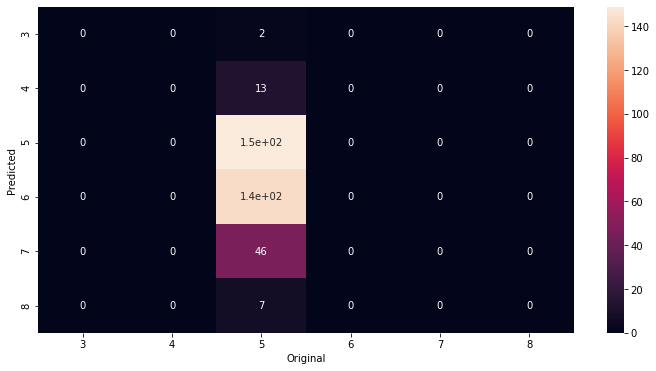

In [66]:
y_pred_reg_3=model_reg_3.predict(X_test).astype("int64")
print("The Accuracy of the model is : ",accuracy_score(y_test,y_pred_reg_3))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_reg_3),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


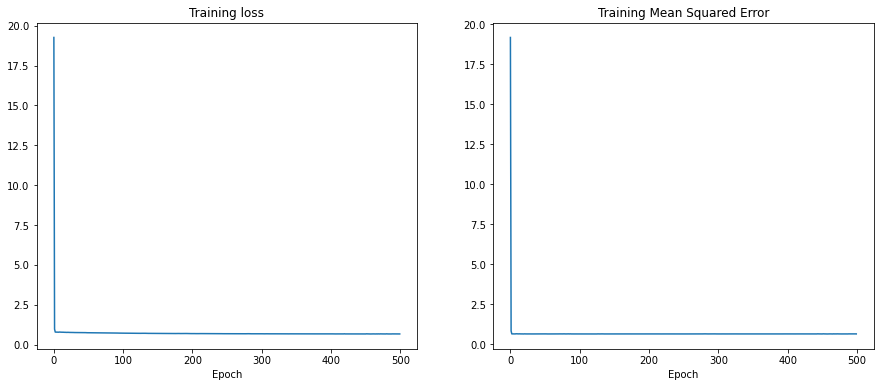

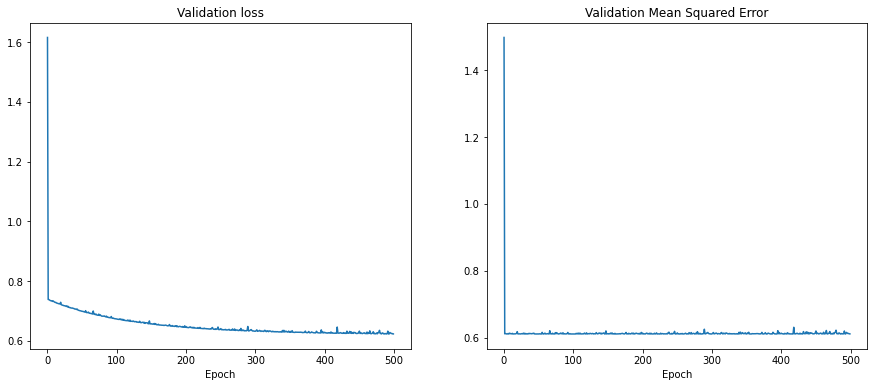

In [67]:
history=history_reg_3.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Training Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_mean_squared_error"])
ax.set_title("Validation Mean Squared Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

Obviously, doing some PCA is not helping at all. Number of itreations with possible changes have been done but they haven't been documented here. Some more testing for a sample has been taken below.

One glaring thing is that data is not at all sufficient we want to train our model because batch size of 50 and 100 epochs has already cleaned the dataset which contains just 1599 input points. Hence we need more data to hit that above 80 accuracy.

# Modifying some options and Testing

In [68]:
#Freshly reloading the data again
X_train1, X_valid, y_train1, y_valid = train_test_split(data, data_org["Signal_Strength"], random_state=0)

In [69]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_1_test=k.Sequential()
#model_cat_1_test.add(Flatten(input_shape=(X_train.shape[1],)))
#model_cat_1_test.add(Reshape((784,),input_shape=(X_train.shape[0],X_train.shape[1],)))
model_cat_1_test.add(BatchNormalization())
model_cat_1_test.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(60,)))
model_cat_1_test.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1_test.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1_test.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1_test.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1_test.add(Dropout(0.2, input_shape=(60,)))
model_cat_1_test.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.4, input_shape=(60,)))
model_cat_1_test.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(30,)))
model_cat_1_test.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dropout(0.2, input_shape=(30,)))
model_cat_1_test.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1_test.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_1_test.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_1_test=model_cat_1_test.fit(X_train1,k.utils.to_categorical(y_train1),batch_size=50, epochs = 1000, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

24/24 [==============================] - 0s 956us/step - loss: 0.2954 - categorical_accuracy: 0.0000e+00
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2917 - categorical_accuracy: 0.0000e+00
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2882 - categorical_accuracy: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 997us/step - loss: 0.2847 - categorical_accuracy: 0.0000e+00
Epoch 5/1000
24/24 [====================

24/24 [==============================] - 0s 831us/step - loss: 0.1617 - categorical_accuracy: 0.4270
Epoch 66/1000
24/24 [==============================] - 0s 790us/step - loss: 0.1604 - categorical_accuracy: 0.4270
Epoch 67/1000
24/24 [==============================] - 0s 873us/step - loss: 0.1593 - categorical_accuracy: 0.4270
Epoch 68/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1581 - categorical_accuracy: 0.4270
Epoch 69/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1569 - categorical_accuracy: 0.4270
Epoch 70/1000
24/24 [==============================] - 0s 873us/step - loss: 0.1558 - categorical_accuracy: 0.4270
Epoch 71/1000
24/24 [==============================] - 0s 873us/step - loss: 0.1547 - categorical_accuracy: 0.4270
Epoch 72/1000
24/24 [==============================] - 0s 873us/step - loss: 0.1536 - categorical_accuracy: 0.4270
Epoch 73/1000
24/24 [==============================] - 0s 914us/step - loss: 0.1525 - categori

24/24 [==============================] - 0s 914us/step - loss: 0.1066 - categorical_accuracy: 0.4270
Epoch 137/1000
24/24 [==============================] - 0s 873us/step - loss: 0.1061 - categorical_accuracy: 0.4270
Epoch 138/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1056 - categorical_accuracy: 0.4270
Epoch 139/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1052 - categorical_accuracy: 0.4270
Epoch 140/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1047 - categorical_accuracy: 0.4270
Epoch 141/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1043 - categorical_accuracy: 0.4270
Epoch 142/1000
24/24 [==============================] - 0s 790us/step - loss: 0.1039 - categorical_accuracy: 0.4270
Epoch 143/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1034 - categorical_accuracy: 0.4270
Epoch 144/1000
24/24 [==============================] - 0s 831us/step - loss: 0.1030 - 

24/24 [==============================] - 0s 956us/step - loss: 0.0859 - categorical_accuracy: 0.4270
Epoch 206/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0857 - categorical_accuracy: 0.4270
Epoch 207/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0856 - categorical_accuracy: 0.4270
Epoch 208/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0854 - categorical_accuracy: 0.4270
Epoch 209/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0852 - categorical_accuracy: 0.4270
Epoch 210/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0850 - categorical_accuracy: 0.4270
Epoch 211/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0849 - categorical_accuracy: 0.4270
Epoch 212/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0847 - categorical_accuracy: 0.4270
Epoch 213/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0846 - ca

24/24 [==============================] - 0s 956us/step - loss: 0.0781 - categorical_accuracy: 0.4270
Epoch 276/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0780 - categorical_accuracy: 0.4270
Epoch 277/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0780 - categorical_accuracy: 0.4270
Epoch 278/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0779 - categorical_accuracy: 0.4270
Epoch 279/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0778 - categorical_accuracy: 0.4270
Epoch 280/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0778 - categorical_accuracy: 0.4270
Epoch 281/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0777 - categorical_accuracy: 0.4270
Epoch 282/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0777 - categorical_accuracy: 0.4270
Epoch 283/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0776 - 

24/24 [==============================] - 0s 997us/step - loss: 0.0750 - categorical_accuracy: 0.4270
Epoch 347/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0750 - categorical_accuracy: 0.4270
Epoch 348/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0749 - categorical_accuracy: 0.4270
Epoch 349/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0749 - categorical_accuracy: 0.4270
Epoch 350/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0749 - categorical_accuracy: 0.4270
Epoch 351/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0749 - categorical_accuracy: 0.4270
Epoch 352/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0748 - categorical_accuracy: 0.4270
Epoch 353/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0748 - categorical_accuracy: 0.4270
Epoch 354/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0748 - catego

Epoch 417/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 418/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 419/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 420/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 421/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 422/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 423/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 424/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0737 - categorical_accuracy: 0.4270
Epoch 425/1000
24/24 [==============================] - 0s 956us/step - lo

24/24 [==============================] - 0s 873us/step - loss: 0.0732 - categorical_accuracy: 0.4270
Epoch 488/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0732 - categorical_accuracy: 0.4270
Epoch 489/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0731 - categorical_accuracy: 0.4270
Epoch 490/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0731 - categorical_accuracy: 0.4270
Epoch 491/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0731 - categorical_accuracy: 0.4270
Epoch 492/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0731 - categorical_accuracy: 0.4270
Epoch 493/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0731 - categorical_accuracy: 0.4270
Epoch 494/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0731 - categorical_accuracy: 0.4270
Epoch 495/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0731 - 

24/24 [==============================] - 0s 831us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 558/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 559/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 560/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 561/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 562/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 563/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0729 - categorical_accuracy: 0.4270
Epoch 564/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0728 - categorical_accuracy: 0.4270
Epoch 565/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0728 - 

24/24 [==============================] - 0s 956us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 628/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 629/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 630/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 631/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 632/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 633/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 634/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0727 - categorical_accuracy: 0.4270
Epoch 635/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0727 - 

24/24 [==============================] - 0s 914us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 698/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 699/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 700/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 701/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 702/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 703/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 704/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0726 - categorical_accuracy: 0.4270
Epoch 705/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0726 - 

24/24 [==============================] - 0s 997us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 768/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 769/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 770/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 771/1000
24/24 [==============================] - ETA: 0s - loss: 0.0752 - categorical_accuracy: 0.44 - 0s 997us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 772/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 773/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 774/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0725 - categorical_accuracy: 0.4270
Epoch 775/1000
24/24 [===========

24/24 [==============================] - 0s 914us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 838/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 839/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 840/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 841/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 842/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 843/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 844/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0724 - categorical_accuracy: 0.4270
Epoch 845/1000
24/24 [==============================] - 0s 956us/step - loss: 0.0724 - ca

24/24 [==============================] - 0s 873us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 908/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 909/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 910/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 911/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 912/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 913/1000
24/24 [==============================] - 0s 914us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 914/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 915/1000
24/24 [==============================] - 0s 997us/step - loss: 0.0723 - 

24/24 [==============================] - 0s 914us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 978/1000
24/24 [==============================] - 0s 873us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 979/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 980/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 981/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 982/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 983/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 984/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - categorical_accuracy: 0.4270
Epoch 985/1000
24/24 [==============================] - 0s 831us/step - loss: 0.0723 - 

dict_keys(['loss', 'categorical_accuracy'])


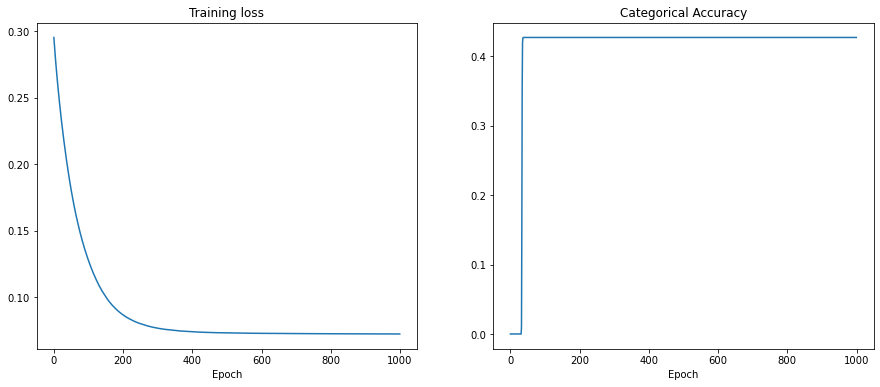

In [70]:
history=history_cat_1_test.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()


Here we have decreased the batch size and increased the number of epochs, but still we couldn't hit a peak accuracy of greater than 0.45. Let us try the same with regression model where we got initial accuracy above 50.

In [71]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_1_test=k.Sequential()
model_reg_1_test.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_1_test.add(Flatten())
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
model_reg_1_test.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.5, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.5, input_shape=(30,)))
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_1_test.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_1_test=model_reg_1_test.fit(X_train1,y_train1,batch_size=50, epochs = 1000) #add verbose later
print("Total Time Taken is : ",t-time.time())

Epoch 1/1000
24/24 [==============================] - 0s 790us/step - loss: 7.4158 - mean_squared_error: 7.3408
Epoch 2/1000
24/24 [==============================] - 0s 831us/step - loss: 0.7568 - mean_squared_error: 0.6720
Epoch 3/1000
24/24 [==============================] - 0s 831us/step - loss: 0.7536 - mean_squared_error: 0.6702
Epoch 4/1000
24/24 [==============================] - 0s 914us/step - loss: 0.7499 - mean_squared_error: 0.6682
Epoch 5/1000
24/24 [==============================] - 0s 790us/step - loss: 0.7497 - mean_squared_error: 0.6695
Epoch 6/1000
24/24 [==============================] - 0s 790us/step - loss: 0.7467 - mean_squared_error: 0.6679
Epoch 7/1000
24/24 [==============================] - 0s 706us/step - loss: 0.7459 - mean_squared_error: 0.6687
Epoch 8/1000
24/24 [==============================] - 0s 706us/step - loss: 0.7440 - mean_squared_error: 0.6682
Epoch 9/1000
24/24 [==============================] - 0s 706us/step - loss: 0.7466 - mean_squared_error:

24/24 [==============================] - 0s 665us/step - loss: 0.3540 - mean_squared_error: 0.3002
Epoch 74/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3589 - mean_squared_error: 0.3053
Epoch 75/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3510 - mean_squared_error: 0.2981
Epoch 76/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3380 - mean_squared_error: 0.2848
Epoch 77/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3681 - mean_squared_error: 0.3152
Epoch 78/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3430 - mean_squared_error: 0.2901
Epoch 79/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3407 - mean_squared_error: 0.2881
Epoch 80/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3584 - mean_squared_error: 0.3057
Epoch 81/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3524 - mean_squared_error: 0.30

24/24 [==============================] - 0s 748us/step - loss: 0.3255 - mean_squared_error: 0.2762
Epoch 146/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3102 - mean_squared_error: 0.2611
Epoch 147/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3156 - mean_squared_error: 0.2665
Epoch 148/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3125 - mean_squared_error: 0.2639
Epoch 149/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3094 - mean_squared_error: 0.2603
Epoch 150/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3217 - mean_squared_error: 0.2731
Epoch 151/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3401 - mean_squared_error: 0.2917
Epoch 152/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3193 - mean_squared_error: 0.2706
Epoch 153/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2923 - mean_squared_err

Epoch 217/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2942 - mean_squared_error: 0.2469
Epoch 218/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3315 - mean_squared_error: 0.2842
Epoch 219/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3187 - mean_squared_error: 0.2716
Epoch 220/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3044 - mean_squared_error: 0.2573
Epoch 221/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3206 - mean_squared_error: 0.2733
Epoch 222/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3277 - mean_squared_error: 0.2805
Epoch 223/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3179 - mean_squared_error: 0.2710
Epoch 224/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3063 - mean_squared_error: 0.2595
Epoch 225/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3094 - m

24/24 [==============================] - 0s 748us/step - loss: 0.2978 - mean_squared_error: 0.2523
Epoch 289/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2994 - mean_squared_error: 0.2538
Epoch 290/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3032 - mean_squared_error: 0.2576
Epoch 291/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3066 - mean_squared_error: 0.2610
Epoch 292/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2898 - mean_squared_error: 0.2444
Epoch 293/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3037 - mean_squared_error: 0.2581
Epoch 294/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3001 - mean_squared_error: 0.2548
Epoch 295/1000
24/24 [==============================] - 0s 873us/step - loss: 0.3029 - mean_squared_error: 0.2575
Epoch 296/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3094 - mean_squared_err

Epoch 360/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2946 - mean_squared_error: 0.2506
Epoch 361/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2913 - mean_squared_error: 0.2476
Epoch 362/1000
24/24 [==============================] - 0s 914us/step - loss: 0.2955 - mean_squared_error: 0.2514
Epoch 363/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3020 - mean_squared_error: 0.2580
Epoch 364/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3010 - mean_squared_error: 0.2572
Epoch 365/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3119 - mean_squared_error: 0.2681
Epoch 366/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2836 - mean_squared_error: 0.2397
Epoch 367/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2995 - mean_squared_error: 0.2555
Epoch 368/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2895 - m

24/24 [==============================] - 0s 706us/step - loss: 0.2912 - mean_squared_error: 0.2482
Epoch 432/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2990 - mean_squared_error: 0.2558
Epoch 433/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2987 - mean_squared_error: 0.2556
Epoch 434/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3072 - mean_squared_error: 0.2642
Epoch 435/1000
24/24 [==============================] - 0s 790us/step - loss: 0.3046 - mean_squared_error: 0.2615
Epoch 436/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2973 - mean_squared_error: 0.2541
Epoch 437/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2970 - mean_squared_error: 0.2540
Epoch 438/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2964 - mean_squared_error: 0.2533
Epoch 439/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3085 - mean_squared_err

Epoch 503/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2879 - mean_squared_error: 0.2459
Epoch 504/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3092 - mean_squared_error: 0.2669
Epoch 505/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2907 - mean_squared_error: 0.2487
Epoch 506/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2936 - mean_squared_error: 0.2518
Epoch 507/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3008 - mean_squared_error: 0.2590
Epoch 508/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3009 - mean_squared_error: 0.2590
Epoch 509/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3065 - mean_squared_error: 0.2646
Epoch 510/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2816 - mean_squared_error: 0.2398
Epoch 511/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2876 - m

24/24 [==============================] - 0s 831us/step - loss: 0.2939 - mean_squared_error: 0.2527
Epoch 575/1000
24/24 [==============================] - 0s 873us/step - loss: 0.2909 - mean_squared_error: 0.2499
Epoch 576/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3089 - mean_squared_error: 0.2677
Epoch 577/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2866 - mean_squared_error: 0.2453
Epoch 578/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2879 - mean_squared_error: 0.2467
Epoch 579/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2851 - mean_squared_error: 0.2439
Epoch 580/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2840 - mean_squared_error: 0.2428
Epoch 581/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2955 - mean_squared_error: 0.2542
Epoch 582/1000
24/24 [==============================] - 0s 707us/step - loss: 0.2997 - mean_squared_err

Epoch 646/1000
24/24 [==============================] - 0s 706us/step - loss: 0.3022 - mean_squared_error: 0.2610
Epoch 647/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3130 - mean_squared_error: 0.2722
Epoch 648/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2883 - mean_squared_error: 0.2475
Epoch 649/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2885 - mean_squared_error: 0.2476
Epoch 650/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2912 - mean_squared_error: 0.2501
Epoch 651/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2970 - mean_squared_error: 0.2558
Epoch 652/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2910 - mean_squared_error: 0.2498
Epoch 653/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2823 - mean_squared_error: 0.2412
Epoch 654/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2988 - m

24/24 [==============================] - 0s 831us/step - loss: 0.2943 - mean_squared_error: 0.2540
Epoch 718/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2962 - mean_squared_error: 0.2557
Epoch 719/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2903 - mean_squared_error: 0.2498
Epoch 720/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2772 - mean_squared_error: 0.2364
Epoch 721/1000
24/24 [==============================] - 0s 873us/step - loss: 0.3078 - mean_squared_error: 0.2670
Epoch 722/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2877 - mean_squared_error: 0.2470
Epoch 723/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2816 - mean_squared_error: 0.2411
Epoch 724/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2864 - mean_squared_error: 0.2458
Epoch 725/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2993 - mean_squared_err

Epoch 789/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2931 - mean_squared_error: 0.2531
Epoch 790/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2850 - mean_squared_error: 0.2448
Epoch 791/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2863 - mean_squared_error: 0.2462
Epoch 792/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2800 - mean_squared_error: 0.2397
Epoch 793/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2893 - mean_squared_error: 0.2490
Epoch 794/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2813 - mean_squared_error: 0.2410
Epoch 795/1000
24/24 [==============================] - 0s 748us/step - loss: 0.3070 - mean_squared_error: 0.2669
Epoch 796/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2963 - mean_squared_error: 0.2562
Epoch 797/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2929 - m

24/24 [==============================] - 0s 831us/step - loss: 0.2838 - mean_squared_error: 0.2445
Epoch 861/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2908 - mean_squared_error: 0.2512
Epoch 862/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2972 - mean_squared_error: 0.2573
Epoch 863/1000
24/24 [==============================] - 0s 873us/step - loss: 0.2923 - mean_squared_error: 0.2526
Epoch 864/1000
24/24 [==============================] - 0s 831us/step - loss: 0.2650 - mean_squared_error: 0.2252
Epoch 865/1000
24/24 [==============================] - 0s 873us/step - loss: 0.3011 - mean_squared_error: 0.2615
Epoch 866/1000
24/24 [==============================] - 0s 831us/step - loss: 0.3121 - mean_squared_error: 0.2726
Epoch 867/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2941 - mean_squared_error: 0.2544
Epoch 868/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2894 - mean_squared_err

Epoch 932/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2857 - mean_squared_error: 0.2466
Epoch 933/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2837 - mean_squared_error: 0.2447
Epoch 934/1000
24/24 [==============================] - 0s 790us/step - loss: 0.2997 - mean_squared_error: 0.2609
Epoch 935/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2956 - mean_squared_error: 0.2567
Epoch 936/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2884 - mean_squared_error: 0.2495
Epoch 937/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2839 - mean_squared_error: 0.2453
Epoch 938/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2913 - mean_squared_error: 0.2525
Epoch 939/1000
24/24 [==============================] - 0s 748us/step - loss: 0.2794 - mean_squared_error: 0.2408
Epoch 940/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2963 - m

The Accuracy of the model is :  0.53


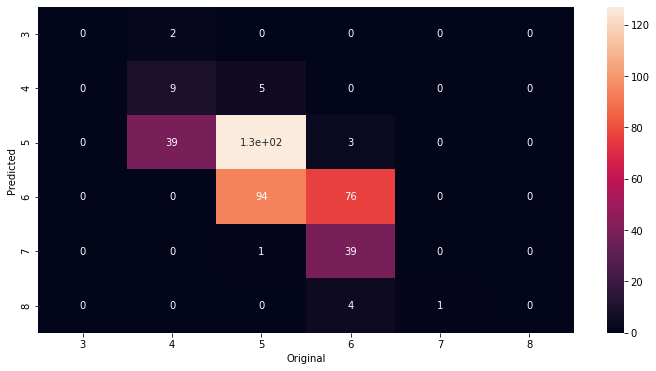

In [72]:
y_pred_reg_1_test=model_reg_1_test.predict(X_valid).astype("int64")
###########################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the model is : ",accuracy_score(y_valid,y_pred_reg_1_test))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,y_pred_reg_1_test),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

dict_keys(['loss', 'mean_squared_error'])


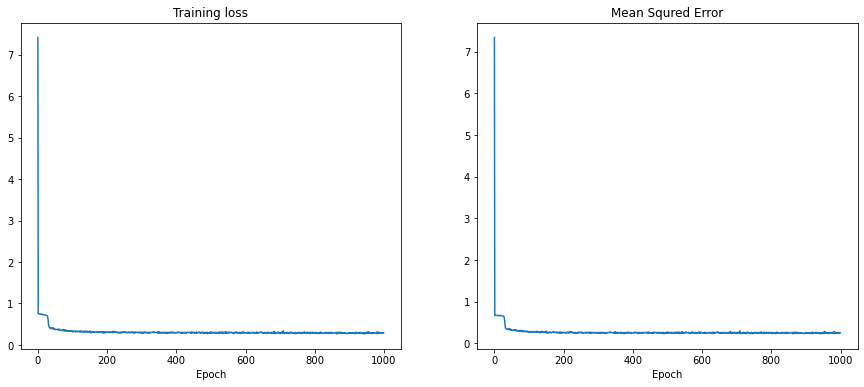

In [73]:
history=history_reg_1_test.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squred Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

**Reducing the number of layers and Neurons here checking it out**

In [74]:
###################################################################
#Categorical Neural Network
###################################################################
model_cat_1=k.Sequential()
#model_cat_1.add(Flatten(input_shape=(X_train.shape[1],)))

model_cat_1.add(BatchNormalization())
model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(60,)))
#model_cat_1.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(60,)))
#model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(30,)))
model_cat_1.add(Dense(15,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_1.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.CategoricalAccuracy())

t=time.time()
###################################################################
#
###################################################################
history_cat_1=model_cat_1.fit(X_train1,k.utils.to_categorical(y_train1),batch_size=100, epochs = 500, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 831us/step - loss: 0.1386 - categorical_accuracy: 0.0067
Epoch 2/500
12/12 [==============================] - 0s 831us/step - loss: 0.1383 - categorical_accuracy: 0.0067
Epoch 3/500
12/12 [==============================] - 0s 748us/step - loss: 0.1379 - categorical_accuracy: 0.0067
Epoch 4/500
12/12 [==============================] - 0s 831us/step - loss: 0.1375 - categorical_accuracy: 0.0067
Epoch 5/500
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 748us/step - loss: 0.1160 - categorical_accuracy: 0.4270
Epoch 67/500
12/12 [==============================] - 0s 748us/step - loss: 0.1157 - categorical_accuracy: 0.4270
Epoch 68/500
12/12 [==============================] - 0s 748us/step - loss: 0.1154 - categorical_accuracy: 0.4270
Epoch 69/500
12/12 [==============================] - 0s 665us/step - loss: 0.1151 - categorical_accuracy: 0.4270
Epoch 70/500
12/12 [==============================] - 0s 748us/step - loss: 0.1149 - categorical_accuracy: 0.4270
Epoch 71/500
12/12 [==============================] - 0s 831us/step - loss: 0.1146 - categorical_accuracy: 0.4270
Epoch 72/500
12/12 [==============================] - 0s 582us/step - loss: 0.1143 - categorical_accuracy: 0.4270
Epoch 73/500
12/12 [==============================] - 0s 665us/step - loss: 0.1140 - categorical_accuracy: 0.4270
Epoch 74/500
12/12 [==============================] - 0s 665us/step - loss: 0.1137 - categorical_accu

12/12 [==============================] - 0s 665us/step - loss: 0.1002 - categorical_accuracy: 0.4270
Epoch 138/500
12/12 [==============================] - 0s 665us/step - loss: 0.1001 - categorical_accuracy: 0.4270
Epoch 139/500
12/12 [==============================] - 0s 665us/step - loss: 0.0999 - categorical_accuracy: 0.4270
Epoch 140/500
12/12 [==============================] - 0s 665us/step - loss: 0.0998 - categorical_accuracy: 0.4270
Epoch 141/500
12/12 [==============================] - 0s 665us/step - loss: 0.0996 - categorical_accuracy: 0.4270
Epoch 142/500
12/12 [==============================] - 0s 665us/step - loss: 0.0995 - categorical_accuracy: 0.4270
Epoch 143/500
12/12 [==============================] - 0s 665us/step - loss: 0.0993 - categorical_accuracy: 0.4270
Epoch 144/500
12/12 [==============================] - 0s 748us/step - loss: 0.0992 - categorical_accuracy: 0.4270
Epoch 145/500
12/12 [==============================] - 0s 665us/step - loss: 0.0990 - categori

12/12 [==============================] - 0s 914us/step - loss: 0.0912 - categorical_accuracy: 0.4270
Epoch 209/500
12/12 [==============================] - 0s 748us/step - loss: 0.0911 - categorical_accuracy: 0.4270
Epoch 210/500
12/12 [==============================] - 0s 831us/step - loss: 0.0910 - categorical_accuracy: 0.4270
Epoch 211/500
12/12 [==============================] - 0s 831us/step - loss: 0.0909 - categorical_accuracy: 0.4270
Epoch 212/500
12/12 [==============================] - 0s 831us/step - loss: 0.0908 - categorical_accuracy: 0.4270
Epoch 213/500
12/12 [==============================] - 0s 748us/step - loss: 0.0907 - categorical_accuracy: 0.4270
Epoch 214/500
12/12 [==============================] - 0s 831us/step - loss: 0.0905 - categorical_accuracy: 0.4270
Epoch 215/500
12/12 [==============================] - 0s 831us/step - loss: 0.0905 - categorical_accuracy: 0.4270
Epoch 216/500
12/12 [==============================] - 0s 831us/step - loss: 0.0903 - categori

12/12 [==============================] - 0s 831us/step - loss: 0.0844 - categorical_accuracy: 0.4270
Epoch 280/500
12/12 [==============================] - 0s 831us/step - loss: 0.0843 - categorical_accuracy: 0.4270
Epoch 281/500
12/12 [==============================] - 0s 831us/step - loss: 0.0842 - categorical_accuracy: 0.4270
Epoch 282/500
12/12 [==============================] - 0s 748us/step - loss: 0.0842 - categorical_accuracy: 0.4270
Epoch 283/500
12/12 [==============================] - 0s 831us/step - loss: 0.0841 - categorical_accuracy: 0.4270
Epoch 284/500
12/12 [==============================] - 0s 748us/step - loss: 0.0840 - categorical_accuracy: 0.4270
Epoch 285/500
12/12 [==============================] - 0s 748us/step - loss: 0.0839 - categorical_accuracy: 0.4270
Epoch 286/500
12/12 [==============================] - 0s 748us/step - loss: 0.0838 - categorical_accuracy: 0.4270
Epoch 287/500
12/12 [==============================] - 0s 748us/step - loss: 0.0837 - categori

12/12 [==============================] - 0s 748us/step - loss: 0.0797 - categorical_accuracy: 0.4270
Epoch 351/500
12/12 [==============================] - 0s 665us/step - loss: 0.0796 - categorical_accuracy: 0.4270
Epoch 352/500
12/12 [==============================] - 0s 665us/step - loss: 0.0796 - categorical_accuracy: 0.4270
Epoch 353/500
12/12 [==============================] - 0s 665us/step - loss: 0.0795 - categorical_accuracy: 0.4270
Epoch 354/500
12/12 [==============================] - 0s 665us/step - loss: 0.0795 - categorical_accuracy: 0.4270
Epoch 355/500
12/12 [==============================] - 0s 748us/step - loss: 0.0794 - categorical_accuracy: 0.4270
Epoch 356/500
12/12 [==============================] - 0s 748us/step - loss: 0.0794 - categorical_accuracy: 0.4270
Epoch 357/500
12/12 [==============================] - 0s 665us/step - loss: 0.0794 - categorical_accuracy: 0.4270
Epoch 358/500
12/12 [==============================] - 0s 748us/step - loss: 0.0793 - categori

12/12 [==============================] - 0s 748us/step - loss: 0.0771 - categorical_accuracy: 0.4270
Epoch 421/500
12/12 [==============================] - 0s 748us/step - loss: 0.0771 - categorical_accuracy: 0.4270
Epoch 422/500
12/12 [==============================] - 0s 748us/step - loss: 0.0771 - categorical_accuracy: 0.4270
Epoch 423/500
12/12 [==============================] - 0s 665us/step - loss: 0.0770 - categorical_accuracy: 0.4270
Epoch 424/500
12/12 [==============================] - 0s 748us/step - loss: 0.0770 - categorical_accuracy: 0.4270
Epoch 425/500
12/12 [==============================] - 0s 831us/step - loss: 0.0770 - categorical_accuracy: 0.4270
Epoch 426/500
12/12 [==============================] - 0s 831us/step - loss: 0.0769 - categorical_accuracy: 0.4270
Epoch 427/500
12/12 [==============================] - 0s 831us/step - loss: 0.0769 - categorical_accuracy: 0.4270
Epoch 428/500
12/12 [==============================] - 0s 748us/step - loss: 0.0769 - categori

12/12 [==============================] - 0s 748us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 492/500
12/12 [==============================] - 0s 748us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 493/500
12/12 [==============================] - 0s 748us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 494/500
12/12 [==============================] - 0s 748us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 495/500
12/12 [==============================] - 0s 748us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 496/500
12/12 [==============================] - 0s 665us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 497/500
12/12 [==============================] - 0s 665us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 498/500
12/12 [==============================] - 0s 665us/step - loss: 0.0756 - categorical_accuracy: 0.4270
Epoch 499/500
12/12 [==============================] - 0s 665us/step - loss: 0.0755 - categori

dict_keys(['loss', 'categorical_accuracy'])


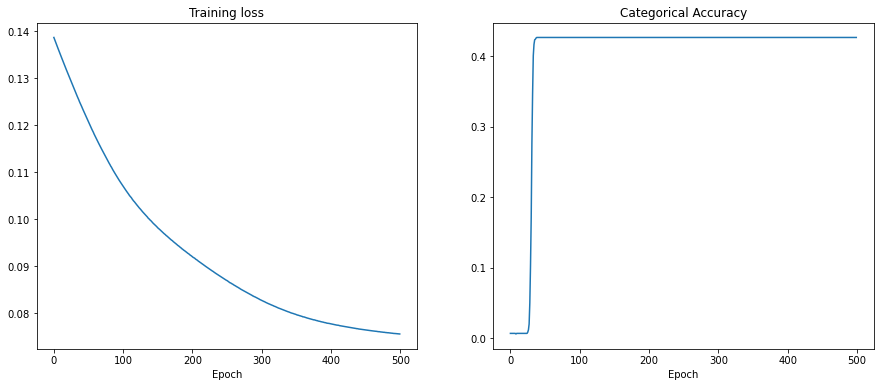

In [75]:
history=history_cat_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()


In [76]:
###################################################################
#Regressional Neural Network
###################################################################
model_reg_1_test=k.Sequential()
model_reg_1_test.add(BatchNormalization(input_shape=(X_train1.shape[1],)))
model_reg_1_test.add(Flatten())
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1_test.add(Dense(30,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.5, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.2, input_shape=(50,)))
#model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1_test.add(Dropout(0.5, input_shape=(30,)))
model_reg_1_test.add(Dense(50,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1_test.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.6)
model_reg_1_test.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg_1_test=model_reg_1_test.fit(X_train1,y_train1,batch_size=50, epochs = 1000) #add verbose later
print("Total Time Taken is : ",t-time.time())

Epoch 1/1000
24/24 [==============================] - 0s 540us/step - loss: 7.2027 - mean_squared_error: 7.1539
Epoch 2/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3760 - mean_squared_error: 0.3159
Epoch 3/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3278 - mean_squared_error: 0.2685
Epoch 4/1000
24/24 [==============================] - 0s 623us/step - loss: 0.3348 - mean_squared_error: 0.2764
Epoch 5/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3223 - mean_squared_error: 0.2651
Epoch 6/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3265 - mean_squared_error: 0.2701
Epoch 7/1000
24/24 [==============================] - 0s 623us/step - loss: 0.3172 - mean_squared_error: 0.2615
Epoch 8/1000
24/24 [==============================] - 0s 665us/step - loss: 0.3195 - mean_squared_error: 0.2648
Epoch 9/1000
24/24 [==============================] - 0s 623us/step - loss: 0.3169 - mean_squared_error:

24/24 [==============================] - 0s 540us/step - loss: 0.2586 - mean_squared_error: 0.2265
Epoch 74/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2476 - mean_squared_error: 0.2157
Epoch 75/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2497 - mean_squared_error: 0.2179
Epoch 76/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2547 - mean_squared_error: 0.2229
Epoch 77/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2574 - mean_squared_error: 0.2258
Epoch 78/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2557 - mean_squared_error: 0.2243
Epoch 79/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2647 - mean_squared_error: 0.2336
Epoch 80/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2576 - mean_squared_error: 0.2263
Epoch 81/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2479 - mean_squared_error: 0.21

24/24 [==============================] - 0s 540us/step - loss: 0.2380 - mean_squared_error: 0.2106
Epoch 146/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2419 - mean_squared_error: 0.2144
Epoch 147/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2480 - mean_squared_error: 0.2207
Epoch 148/1000
24/24 [==============================] - 0s 706us/step - loss: 0.2266 - mean_squared_error: 0.1994
Epoch 149/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2338 - mean_squared_error: 0.2065
Epoch 150/1000
24/24 [==============================] - ETA: 0s - loss: 0.3088 - mean_squared_error: 0.28 - 0s 665us/step - loss: 0.2522 - mean_squared_error: 0.2251
Epoch 151/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2413 - mean_squared_error: 0.2142
Epoch 152/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2314 - mean_squared_error: 0.2044
Epoch 153/1000
24/24 [=============================

24/24 [==============================] - 0s 540us/step - loss: 0.2327 - mean_squared_error: 0.2086
Epoch 217/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2331 - mean_squared_error: 0.2091
Epoch 218/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2375 - mean_squared_error: 0.2135
Epoch 219/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2216 - mean_squared_error: 0.1977
Epoch 220/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2376 - mean_squared_error: 0.2137
Epoch 221/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2565 - mean_squared_error: 0.2327
Epoch 222/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2311 - mean_squared_error: 0.2074
Epoch 223/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2309 - mean_squared_error: 0.2072
Epoch 224/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2303 - mean_squared_err

24/24 [==============================] - 0s 582us/step - loss: 0.2417 - mean_squared_error: 0.2200
Epoch 288/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2323 - mean_squared_error: 0.2106
Epoch 289/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2315 - mean_squared_error: 0.2099
Epoch 290/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2359 - mean_squared_error: 0.2142
Epoch 291/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2431 - mean_squared_error: 0.2216
Epoch 292/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2220 - mean_squared_error: 0.2004
Epoch 293/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2436 - mean_squared_error: 0.2218
Epoch 294/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2329 - mean_squared_error: 0.2112
Epoch 295/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2262 - mean_squared_err

Epoch 359/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2331 - mean_squared_error: 0.2128
Epoch 360/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2414 - mean_squared_error: 0.2211
Epoch 361/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2275 - mean_squared_error: 0.2071
Epoch 362/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2282 - mean_squared_error: 0.2079
Epoch 363/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2196 - mean_squared_error: 0.1994
Epoch 364/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2316 - mean_squared_error: 0.2113
Epoch 365/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2240 - mean_squared_error: 0.2039
Epoch 366/1000
24/24 [==============================] - 0s 665us/step - loss: 0.2294 - mean_squared_error: 0.2092
Epoch 367/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2301 - m

24/24 [==============================] - 0s 540us/step - loss: 0.2281 - mean_squared_error: 0.2086
Epoch 431/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2236 - mean_squared_error: 0.2042
Epoch 432/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2255 - mean_squared_error: 0.2060
Epoch 433/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2190 - mean_squared_error: 0.1996
Epoch 434/1000
24/24 [==============================] - 0s 499us/step - loss: 0.2272 - mean_squared_error: 0.2077
Epoch 435/1000
24/24 [==============================] - ETA: 0s - loss: 0.2856 - mean_squared_error: 0.26 - 0s 540us/step - loss: 0.2269 - mean_squared_error: 0.2074
Epoch 436/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2373 - mean_squared_error: 0.2179
Epoch 437/1000
24/24 [==============================] - 0s 499us/step - loss: 0.2348 - mean_squared_error: 0.2154
Epoch 438/1000
24/24 [=============================

24/24 [==============================] - 0s 499us/step - loss: 0.2345 - mean_squared_error: 0.2158
Epoch 502/1000
24/24 [==============================] - 0s 499us/step - loss: 0.2343 - mean_squared_error: 0.2156
Epoch 503/1000
24/24 [==============================] - 0s 499us/step - loss: 0.2262 - mean_squared_error: 0.2076
Epoch 504/1000
24/24 [==============================] - 0s 499us/step - loss: 0.2351 - mean_squared_error: 0.2164
Epoch 505/1000
24/24 [==============================] - 0s 499us/step - loss: 0.2263 - mean_squared_error: 0.2075
Epoch 506/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2409 - mean_squared_error: 0.2221
Epoch 507/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2245 - mean_squared_error: 0.2059
Epoch 508/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2247 - mean_squared_error: 0.2060
Epoch 509/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2384 - mean_squared_err

Epoch 573/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2300 - mean_squared_error: 0.2121
Epoch 574/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2316 - mean_squared_error: 0.2138
Epoch 575/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2283 - mean_squared_error: 0.2105
Epoch 576/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2278 - mean_squared_error: 0.2099
Epoch 577/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2309 - mean_squared_error: 0.2129
Epoch 578/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2333 - mean_squared_error: 0.2153
Epoch 579/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2378 - mean_squared_error: 0.2198
Epoch 580/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2327 - mean_squared_error: 0.2146
Epoch 581/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2387 - m

24/24 [==============================] - 0s 582us/step - loss: 0.2319 - mean_squared_error: 0.2143
Epoch 645/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2243 - mean_squared_error: 0.2067
Epoch 646/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2337 - mean_squared_error: 0.2161
Epoch 647/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2251 - mean_squared_error: 0.2075
Epoch 648/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2298 - mean_squared_error: 0.2122
Epoch 649/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2319 - mean_squared_error: 0.2143
Epoch 650/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2295 - mean_squared_error: 0.2120
Epoch 651/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2144 - mean_squared_error: 0.1968
Epoch 652/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2249 - mean_squared_err

Epoch 716/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2355 - mean_squared_error: 0.2182
Epoch 717/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2230 - mean_squared_error: 0.2056
Epoch 718/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2295 - mean_squared_error: 0.2122
Epoch 719/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2261 - mean_squared_error: 0.2088
Epoch 720/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2229 - mean_squared_error: 0.2055
Epoch 721/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2302 - mean_squared_error: 0.2128
Epoch 722/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2185 - mean_squared_error: 0.2011
Epoch 723/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2269 - mean_squared_error: 0.2094
Epoch 724/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2195 - m

24/24 [==============================] - 0s 623us/step - loss: 0.2351 - mean_squared_error: 0.2182
Epoch 788/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2282 - mean_squared_error: 0.2111
Epoch 789/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2355 - mean_squared_error: 0.2186
Epoch 790/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2283 - mean_squared_error: 0.2113
Epoch 791/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2246 - mean_squared_error: 0.2078
Epoch 792/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2528 - mean_squared_error: 0.2360
Epoch 793/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2268 - mean_squared_error: 0.2099
Epoch 794/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2320 - mean_squared_error: 0.2149
Epoch 795/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2280 - mean_squared_err

Epoch 859/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2331 - mean_squared_error: 0.2165
Epoch 860/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2234 - mean_squared_error: 0.2068
Epoch 861/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2377 - mean_squared_error: 0.2212
Epoch 862/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2356 - mean_squared_error: 0.2190
Epoch 863/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2352 - mean_squared_error: 0.2187
Epoch 864/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2208 - mean_squared_error: 0.2042
Epoch 865/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2202 - mean_squared_error: 0.2036
Epoch 866/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2215 - mean_squared_error: 0.2048
Epoch 867/1000
24/24 [==============================] - 0s 540us/step - loss: 0.2207 - m

24/24 [==============================] - 0s 623us/step - loss: 0.2498 - mean_squared_error: 0.2334
Epoch 931/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2182 - mean_squared_error: 0.2019
Epoch 932/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2229 - mean_squared_error: 0.2064
Epoch 933/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2396 - mean_squared_error: 0.2231
Epoch 934/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2242 - mean_squared_error: 0.2077
Epoch 935/1000
24/24 [==============================] - 0s 623us/step - loss: 0.2237 - mean_squared_error: 0.2073
Epoch 936/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2213 - mean_squared_error: 0.2048
Epoch 937/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2119 - mean_squared_error: 0.1954
Epoch 938/1000
24/24 [==============================] - 0s 582us/step - loss: 0.2366 - mean_squared_err

dict_keys(['loss', 'mean_squared_error'])


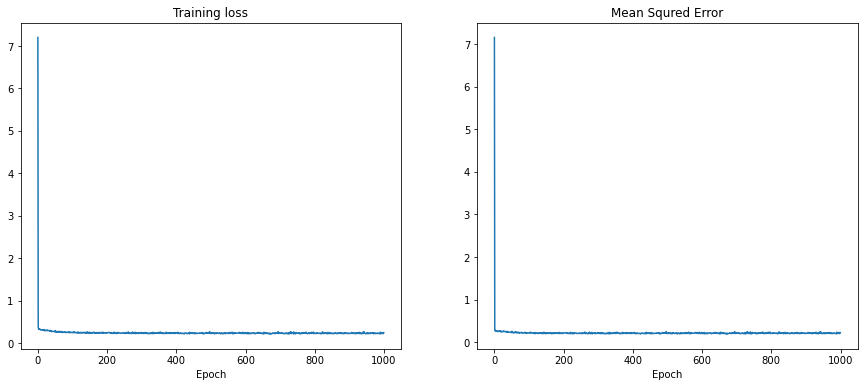

In [77]:
history=history_reg_1_test.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["mean_squared_error"])
ax.set_title("Mean Squred Error")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

The Accuracy of the model is :  0.405


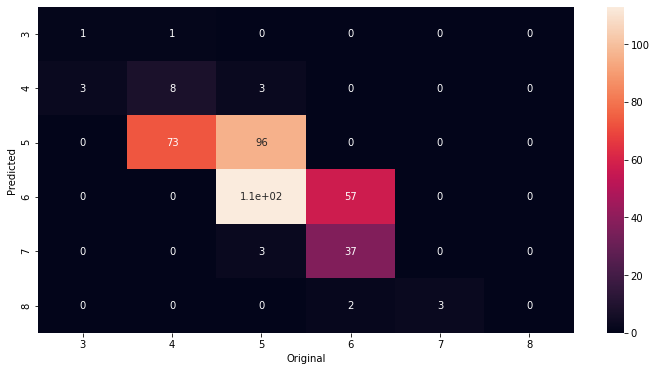

In [78]:
labels=y_train1.astype("category").dtype.categories
y_pred_reg_1_test=model_reg_1_test.predict(X_valid).astype("int64")
###########################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the model is : ",accuracy_score(y_valid,y_pred_reg_1_test))
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_valid,y_pred_reg_1_test),xticklabels=labels,yticklabels=labels,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

**Please Note**
We can certainly make a lot of imporvements upon what is presented here but it required a lot of experimentation and other options which includes but not restricted to the concept of convolution and a lot of other things. I think it is beyond the scope of the given problem statement and the mark weightage. In future projects advanced options might be explored.

Most of the observations are pretty clear needn't required a good description whether here and there a little statement has been sprinkled out. Most of the explanations are self-explanatory either in the beginning or within the itself.
Thanks for the valuable feedback.